# Monetary Economics: Chapter 10

### Preliminaries

In [44]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

from pysolve.model import Model
from pysolve.utils import is_close,round_solution

import matplotlib.pyplot as plt

### Model INSOUT

In [45]:
def create_insout_model():
    model = Model()

    model.set_var_default(0)
    model.var('Ad', desc='Demand for Central bank advances from commercial banks')
    model.var('As', desc='Supply of central bank advances to commercial banks')
    model.var('Bbd', desc='Government bills demanded by commercial banks')
    model.var('Bbdn', desc='Notional demand for government bills from commercial banks')
    model.var('Bcb', desc='Government bills held by Central bank')
    model.var('Bhd', desc='Demand for government bills')
    model.var('Bhh', desc='Government bills held by households')
    model.var('Bs', desc='Supply of government bills')
    model.var('BLd', desc='Demand for government bonds')
    model.var('BLh', desc='Demand for government bonds')
    model.var('BLs', desc='Supply of government bonds')
    model.var('BLR', desc='Gross bank liquidity ratio')
    model.var('BLRn', desc='Net bank liquidity ratio')
    model.var('BPM', desc="Banks' profit margin")
    model.var('Ck', desc='Real consumption')
    model.var('CG', desc='Capital gains on government bonds')
    model.var('CONS', desc='Consumption at current prices')
    model.var('F', desc='Realized profits of firms and banks')
    model.var('Fb', desc='Realized profits of firms and banks')
    model.var('Fcb', desc='Central bank "profits"')
    model.var('Ff', desc='Realized firm profits')
    model.var('Ffe', desc='Expected profits of firms')
    model.var('G', desc='Government expenditures')
    model.var('Hbd', desc='Cash required by banks')
    model.var('Hbs', desc='Cash supplied to banks')
    model.var('Hhd', desc='Household demand for cash')
    model.var('Hhh', desc='Cash held by households')
    model.var('Hhs', desc='Cash supplied by households')
    model.var('Hs', desc='Total supply of cash')
    model.var('IN', desc='Stock of inventories at current costs')
    model.var('INk', desc='Real inventories')
    model.var('INke', desc='Expected real inventories')
    model.var('INkt', desc='Target level of real inventories')
    model.var('Ld', desc='Demand for loans')
    model.var('Ls', desc='Supply of loans')
    model.var('M1h', desc='Checking deposits held by households')
    model.var('M1hn', desc='Notional holding of checking deposits')
    model.var('M1s', desc='Checking deposits supplied by banks')
    model.var('M2d', desc='Demand for term deposits - constrained to be non-negative')
    model.var('M2h', desc='Term deposits held by households')
    model.var('M2s', desc='Term deposits supplied by banks')
    model.var('N', desc='Employment level')
    model.var('NHUC', desc='Normal historic unit costs')
    model.var('omegat', desc='Target real wage for workers')
    model.var('P', desc='Price level')
    model.var('Pbl', desc='Price of government bonds')
    model.var('PI', desc='Price inflation')
    model.var('PSBR', desc='Government deficit')
    model.var('Ra', desc='Interest rate on Central bank advances')
    model.var('Rb', desc='Interest rate on government bills')
    model.var('Rbl', desc='Interest rate on bonds')
    model.var('Rl', desc='Interest rate on loans')
    model.var('Rm', desc='Interest rate on deposits')
    model.var('RRb', desc='Real interest rate on bills')
    model.var('RRbl', desc='Real interest rate on long term bonds')
    model.var('RRl', desc='Real interest rate on loans')
    model.var('RRm', desc='Real interest rate on term deposits')
    model.var('S', desc='Sales at current prices')
    model.var('Sk', desc='Real sales')
    model.var('Ske', desc='Expected real sales')
    model.var('sigmas', desc='Realized inventories to sales ratio')
    model.var('sigmat', desc='Target inventories to sales ratio')
    model.var('T', desc='Taxes')
    model.var('UC', desc='Unit costs')
    model.var('V', desc='Wealth of households')
    model.var('Ve', desc='Expected household wealth')
    model.var('Vk', desc='Real wealth of households')
    model.var('Vnc', desc='Wealth of households, net cash')
    model.var('Vnce', desc='Expected wealth of households, net cash')
    model.var('WB', desc='The wage bill')
    model.var('Y', desc='Output at current prices')
    model.var('Yk', desc='Real output')
    model.var('YDhs', desc='Haig-Simons measure of disposable income')
    model.var('YDkhs', desc='Haig-Simons measure of real disposable income')
    model.var('YDkr', desc='Regular real disposable income')
    model.var('YDkre', desc='Expected regular real disposable income')
    model.var('YDr', desc='Regular disposable income')
    model.var('YDre', desc='Expected regular disposable income')
    

    model.set_param_default(0)
    model.param('alpha0', desc='Autonomous consumption')
    model.param('alpha1', desc='Propensity to consume out of income')
    model.param('alpha2', desc='Propensity to consume out of wealth')
    model.param('beta', desc='Parameter in expectation formations on real sales')
    model.param('bot', desc='Bottom value for bank net liquidity ratio')
    model.param('botpm', desc='Bottom value for bank profit margin')
    model.param('eps', desc='Parameter in expectation formations on real disposable income')
    model.param('gamma', desc='Speed of adjustment of inventories to the target level')
    model.param('lambda20', desc='Parameter in household demand for time deposits')
    model.param('lambda21', desc='Parameter in household demand for time deposits')
    model.param('lambda22', desc='Parameter in household demand for time deposits')
    model.param('lambda23', desc='Parameter in household demand for time deposits')
    model.param('lambda24', desc='Parameter in household demand for time deposits')
    model.param('lambda25', desc='Parameter in household demand for time deposits')
    model.param('lambda30', desc='Parameter in household demand for bills')
    model.param('lambda31', desc='Parameter in household demand for bills')
    model.param('lambda32', desc='Parameter in household demand for bills')
    model.param('lambda33', desc='Parameter in household demand for bills')
    model.param('lambda34', desc='Parameter in household demand for bills')
    model.param('lambda35', desc='Parameter in household demand for bills')
    model.param('lambda40', desc='Parameter in household demand for bonds')
    model.param('lambda41', desc='Parameter in household demand for bonds')
    model.param('lambda42', desc='Parameter in household demand for bonds')
    model.param('lambda43', desc='Parameter in household demand for bonds')
    model.param('lambda44', desc='Parameter in household demand for bonds')
    model.param('lambda45', desc='Parameter in household demand for bonds')
    model.param('lambdac', desc='Parameter in household demand for cash')
    model.param('phi', desc='Mark-up on unit costs')
    model.param('ro1', desc='Reserve requirements parameter')
    model.param('ro2', desc='Reserve requirements parameter')
    model.param('sigma0', desc='Parameter determining the target inventories to sales ratio')
    model.param('sigma1', desc='Parameter linking the target inventories to sales ratio to the interest rate')
    model.param('tau', desc='Sales tax rate')
    model.param('top', desc='Top value for bank net liquidity ratio')
    model.param('toppm', desc='Top value for bank profit margin')
    
    model.var('z1', desc='Is 1 if bank checking accounts are non-negative')
    model.var('z2', desc='Is 1 if bank checking accounts are negative')
    model.var('z3', desc='Is 1 if banks net liquidity ratio is below bottom level')
    model.var('z4', desc='Is 1 if banks net liquidity ratio was below bottom level')
    model.var('z4b', desc='Is 1 if banks net liquidity ratio was way below bottom level')
    model.var('z5', desc='Is 1 if banks net liquidity ratio was above top level')
    model.var('z5b', desc='Is 1 if banks net liquidity ratio was way above top level')
    model.var('z6', desc='Is 1 if banks profit margin is below bottom level')
    model.var('z7', desc='Is 1 if banks profit margin is above top level')
    
    model.param('xib', desc='Parameter in the equation for setting interest rate on deposits')
    model.param('xil', desc='Parameter in the equation for setting interest rate on loans')
    model.param('xim', desc='Parameter in the equation for setting interest rate on deposits')
    model.param('omega0', desc='Parameter influencing the target real wage for workers')
    model.param('omega1', desc='Parameter influencing the target real wage for workers')
    model.param('omega2', desc='Parameter influencing the target real wage for workers')
    model.param('omega3', desc='Speed of adjustment of wages to target value')
    
    model.param('ERrbl', desc='Expected rate of return on long term bonds')
    model.param('Gk', desc='Real government expenditures')
    model.param('Nfe', desc='Full employment level')
    model.param('PR', desc='Labour productivity')
    model.param('Rbbar', desc='Interest rate on bills, set exogenously')
    model.param('Rblbar', desc='Interest rate on bonds, set exogenously')
    
    model.var('W', desc='Wage rate')

    # Box 10.1 Firms' decisions
    # -------------------------
    
    model.add('Yk = Ske + INke - INk(-1)')          # 10.1 : Real output
    model.add('N = Yk/PR')                          # 10.2 : Employment
    model.add('WB = N*W')                           # 10.3 : The wage bill
    model.add('UC = WB/Yk')                         # 10.4 : Unit costs
    model.add('Ske = beta*Sk(-1) + (1-beta)*Ske(-1)') # 10.5 : Expected real sales
    model.add('INkt = sigmat * Ske')                # 10.6 : Target level of real inventories    
    model.add('sigmat = sigma0 - sigma1*Rl')       # 10.7 : Target inventories to sales ratio
    model.add('RRl = (1 + Rl)/(1 + PI) - 1')       # 10.8 : Real interest rate on loans
    model.add('INke = INk(-1) + gamma*(INkt - INk(-1))') # 10.9 : Expected real inventories
    model.add('NHUC = (1 - sigmat)*UC + sigmat*(1 + Rl(-1))*UC(-1)') # 10.11 : Normal historic unit costs
    model.add('P = (1 + tau)*(1 + phi)*NHUC')       # 10.10 : Price level
    model.add('Ffe = (phi/(1+phi))*(1/(1+tau))*P*Ske') # 10.11A : Expected profits of firms

    # Box 10.2 : Firms' equations
    # ---------------------------
    model.add('Sk = Ck + Gk')                       # 10.12 : Real sales
    model.add('S = P * Sk')                         # 10.13 : Sales at current prices
    model.add('INk - INk(-1) = Yk - Sk')            # 10.14 : Real inventories
    model.add('sigmas = INk(-1)/Sk')                # 10.15 : Realized inventories to sales ratio
    model.add('IN = INk*UC')                        # 10.16 : Stock of inventories
    model.add('Ld = IN')                            # 10.17 : Demand for loans
    model.add('Ff = S - T - WB + IN - IN(-1) - Rl(-1)*IN(-1)') # 10.18 : Firms realized profits
    model.add('PI = P/P(-1) - 1')                   # 10.19 : Rate of price inflation

    # Box 10.3 : Household equations
    # ------------------------------
    model.add('YDr = WB + F + Rm(-1)*M2d(-1) + Rb(-1)*Bhh(-1) + BLh(-1)') # 10.20 : Regular disposable income
    model.add('CG = (Pbl - Pbl(-1))*BLh(-1)')       # 10.21 : Capital gains on bonds
    model.add('YDhs = YDr + CG')                    # 10.22 : Haig-Simons measure of disposable income
    model.add('F = Ff + Fb')                        # 10.23 : Total net profits
    model.add('V = V(-1) + YDhs - CONS')            # 10.24 : Nominal wealth
    model.add('Vnc = V - Hhd')                      # 10.25 : Nominal wealth net of cash
    model.add('YDkr = (YDr - PI*V(-1))/P')          # 10.26 : Real regular disposable income
    model.add('YDkhs = (YDr - PI*V(-1) + CG)/P')    # 10.27 : Real HS disposable income
    model.add('Vk = V/P')                           # 10.28 : Real wealth of households

    # Box 10.4 : Household equations
    # ------------------------------
    model.add('Ck = alpha0 + alpha1*YDkre + alpha2*Vk(-1)') # 10.29 : Consumption decision
    model.add('YDkre = eps*YDkr(-1) + (1 - eps)*YDkre(-1)') # 10.30 : Expected real regular disposable income
    model.add('CONS = Ck*P')                        # 10.31 : Consumption at current prices
    model.add('YDre = P*YDkre + PI*V(-1)/P')        # 10.32 : Expected regular disposable income
    model.add('Ve = V(-1) + YDre - CONS')           # 10.33 : Expected nominal wealth
    model.add('Hhd = lambdac*CONS')                 # 10.34 : Household demand for cash
    model.add('Vnce = Ve - Hhd')                    # 10.35 : Expected nominal wealth net of cash

    # Box 10.5 : Households portfolio equations, based on nominal rates
    # -----------------------------------------------------------------
    # 10.37 : Demand for term banks deposit
    model.add('M2d = (lambda20 + lambda22*Rm + lambda23*Rb + lambda24*ERrbl + lambda25*(YDre/Vnce))*Vnce')
    # 10.38 : Demand for government bills
    model.add('Bhd = (lambda30 + lambda32*Rm + lambda33*Rb + lambda34*ERrbl + lambda35*(YDre/Vnce))*Vnce')
    # 10.39 : Demand for government bonds
    model.add('BLd = (lambda40 + lambda42*Rm + lambda43*Rb + lambda44*ERrbl + lambda45*(YDre/Vnce))*Vnce/Pbl')

    # Box 10.6 : Households portfoloio equations, based on real rates
    # ---------------------------------------------------------------
    # 10.37A : "Notional" Demand for term banks deposits
    #   M2d = (lambda20 - lambda21*PI/(1 + PI) + lambda22*RRm + lambda23*RRb + lambda24*RRbl + lambda25*YDre/Vnce))*Vnce
    # 10.38A : Demand for government bills
    #   Bhd = (lambda30 - lambda31*PI/(1 + PI) + lambda32*RRm + lambda33*RRb + lambda34*RRbl + lambda35*YDre/Vnce))*Vnce
    # 10.39A : Demand for government bonds
    #   BLd = (lambda40 - lambda41*PI/(1 + PI) + lambda42*RRm + lambda43*RRb + lambda44*RRbl + lambda45*YDre/Vnce))*Vnce/PIbl

    model.add('RRm = (1 + Rm)/(1 + PI) - 1')        # 10.37B : Real interest rate on term deposits
    model.add('RRb = (1  + Rb)/(1+ PI) - 1')        # 10.38B : Real interest rate on bills
    model.add('RRbl = (1 + Rbl)/(1 + PI) - 1')      # 10.39B : Real interest rate on long-term bonds

    # Box 10.7 : Households equations, realized portfolio asset holding
    # -----------------------------------------------------------------
    model.add('Hhh = Hhd')                          # 10.40 : Cash holding
    model.add('Bhh = Bhd')                          # 10.41 : Holding of bills
    model.add('BLh = BLd')                          # 10.42 : Holding of bonds
    model.add('M1hn = Vnc - M2d - Bhd - Pbl*BLd')   # 10.43 : Notional holding of bank checking accounts
    model.add('M1h = M1hn * z1')                    # 10.44 : Holding of bank checking accounts
    model.add('z1 = if_true(M1hn >= 0)')            # 10.45 : Condition for non-negative bank checking acounts
    model.add('M2h = M2d*z1 + (Vnc - Bhh - Pbl*BLd)*z2') # 10.46 : Holding of bank term deposits
    model.add('z2 = 1 - z1')                        # 10.47 : Condition for negative bank checking accounts

    # Box 10.8 : Government equations
    # -------------------------------
    model.add('T = S*tau/(1 + tau)')                # 10.48 : Tax receipts
    model.add('G = P*Gk')                           # 10.49 : Government expenditures
    model.add('PSBR = G + Rb(-1)*Bs(-1) + BLs(-1) - (T + Fcb)') # 10.50 : Government deficit
    model.add('Bs - Bs(-1) = PSBR - (BLs - BLs(-1))*Pbl') # 10.51 : New issues of bills
    model.add('BLs = BLd')                          # 10.52 : Supply of bonds
    model.add('Pbl = 1/Rbl')                        # 10.53 : Price of bonds
    model.add('Rbl = Rblbar')                       # 10.54 : Yield on bonds is exogenous

    # Box 10.9 : Central bank equations
    # ---------------------------------
    model.add('Hs = Bcb + As')                      # 10.55 : Supply of cash
    model.add('Hbs = Hs - Hhs')                     # 10.56 : Supply of cash to commercial banks
    model.add('Bcb = Bs - Bhh - Bbd')               # 10.57 : CB purchases of government bills
    model.add('Rb = Rbbar')                         # 10.58 : Interest rate on government bills, set exogenously
    model.add('As = Ad')                            # 10.59 : Supply of CB advances to commercial banks
    model.add('Ra = Rb')                            # 10.60 : Interest rate on CB advances
    model.add('Fcb = Rb(-1)*Bcb(-1) + Ra(-1)*As(-1)') # 10.61 : Profits of Central Bank

    # Box 10.10 : Commercial bank equations
    # -------------------------------------
    model.add('Hhs = Hhd')                          # 10.62 : Supply of cash to households
    model.add('M1s = M1h')                          # 10.63 : Supply of checking deposits
    model.add('M2s = M2d')                          # 10.64 : Supply of time deposits
    model.add('Ls = Ld')                            # 10.65 : Supply of loans
    model.add('Hbd = ro1*M1s + ro2*M2s')            # 10.66 : Demand for cash by banks (reserve requirement)

    # Box 10.11 : Commercial bank equations
    # -------------------------------------
    model.add('Bbdn = M1s + M2s - Ls - Hbd')        # 10.67 : Notional demand for bills
    model.add('BLRn = Bbdn/(M1s + M2s)')             # 10.68 : Net bank liquidity ratio
    model.add('Ad = (bot*(M1s + M2s) - Bbdn)*z3')   # 10.69 : Advances needed by banks
    model.add('z3 = if_true(BLRn < bot)')           # 10.70 : Check if net liquidity is above bottom value
    model.add('Bbd = Ad + M1s + M2s - Ls - Hbd')    # 10.71 : Demand for government bills
    model.add('BLR = Bbd/(M1s + M2s)')              # 10.72 : Gross bank liquidity ratio

    # Box 10.12 : Commercial bank equations
    # -------------------------------------
    # 10.73 : Interest rate on deposits
    model.add('Rm = Rm(-1) + 0.0001*z4 + 0.0002*z4b - 0.0001*z5 - 0.0002*z5b + xib*(Rb - Rb(-1))')
    model.add('z4 = if_true(BLRn(-1) < bot)')       # 10.75 : Check if net liquidity ratio was below bottom value
    model.add('z4b = if_true(BLRn(-1) < (bot - 0.02))')
    model.add('z5 = if_true(BLRn(-1) > top)')        # 10.76 : Check if net liquidity ratio was above top value
    model.add('z5b = if_true(BLRn(-1) > (top+0.02))')
    # 10.77 : Realized bank profits
    model.add('Fb = Rl(-1)*Ls(-1) + Rb(-1)*Bbd(-1) - Rm(-1)*M2s(-1) - Ra(-1)*Ad(-1)')
    model.add('Rl - Rl(-1) = xil*(z6 - z7) + (Rb - Rb(-1))') # 10.78 : Interest rate on loans
    model.add('z6 = if_true(BPM < botpm)')          # 10.80 : Check if banks profit margin is below bottom value
    model.add('z7 = if_true(BPM > toppm)')          # 10.81 : Check if banks profit margin is above top value
    model.add('BPM = (Fb + Fb(-1))/(M1s(-1) + M1s(-2) + M2s(-1) + M2s(-2))') # 10.82 : Banks profit margin

    # Inflationary forces
    # -------------------
    # 10.84 : Target real wage for workers
    model.add('omegat = exp(omega0 + omega1*log(PR) + omega2*log((N/Nfe)))') 
    model.add('W = W(-1)*(1 + omega3*(omegat(-1) - W(-1)/P(-1)))') # 10.85 Unit wages

    # Addtional equations
    # -------------------
    model.add('Y = P*Sk + (INk - INk(-1))*UC')      # Output at current prices

    return model

insout_parameters = {'alpha0': 0,
                     'alpha1': 0.95,
                     'alpha2': 0.05,
                     'beta': 0.5,
                     'bot': 0.02,
                     'botpm': 0.002,
                     'eps': 0.5,
                     'gamma': 0.5,
                     'lambda20': 0.52245,
                     'lambda21': 20,
                     'lambda22': 40,
                     'lambda23': -20,
                     'lambda24': -20,
                     'lambda25': -0.06,
                     'lambda30': 0.47311,
                     'lambda31': 40,
                     'lambda32': -20,
                     'lambda33': 40,
                     'lambda34': -20,
                     'lambda35': -0.06,
                     'lambda40': 0.17515,
                     'lambda41': 20,
                     'lambda42': -20,
                     'lambda43': -20,
                     'lambda44': 40,
                     'lambda45': -0.06,
                     'lambdac': 0.1,
                     'phi': 0.1,
                     'ro1': 0.1,
                     'ro2': 0.1,
                     'sigma0': 0.3612,
                     'sigma1': 3,
                     'tau': 0.25,
                     'top': 0.04,
                     'toppm': 0.005,
                     'xib': 0.9,
                     'xil': 0.002,
                     'xim': 0.0002,
                     'omega0': -0.32549,
                     'omega1': 1,
                     'omega2': 1.5,
                     'omega3': 0.1}
insout_exogenous = {'Gk': 25,
                    'Nfe': 133.28,
                    'PR': 1,
                    'Rbbar': 0.023,
                    'Rblbar': 0.027,
                    'ERrbl': 0.027,
                    'W': 1}
insout_variables = [('Bbd', 1.19481),
                    ('Bbdn', 1.19481),
                    ('Bcb', 19.355),
                    ('Bhh', 49.69136),
                    ('Bhd', 'Bhh'),
                    ('Bs', 70.25162),
                    ('BLh', 1.12309),
                    ('BLd', 'BLh'),
                    ('BLs', 'BLd'),
                    ('Hbd', 4.36249),
                    ('Hbs', 'Hbd'),
                    ('Hhd', 14.992),
                    ('Hhh', 'Hhd'),
                    ('Hhs', 'Hhd'),
                    ('INk', 38.07),
                    ('INke', 'INk'),
                    ('IN', 38.0676),
                    ('Ls', 38.0676),
                    ('Ld', 'Ls'),
                    ('M1s', 3.9482),
                    ('M1h', 'M1s'),
                    ('M1hn', 'M1s'),
                    ('M2s', 39.667),
                    ('M2d', 'M2s'),
                    ('M2h', 'M2d'),
                    ('Vk', 108.285),
                    
                    ('Ra', 0.02301),
                    ('Rb', 0.02301),
                    ('Rl', 0.02515),
                    ('Rm', 0.02095),
                    ('BLRn', 0.02737),
                    ('Fb', 0.1535),
                    ('P', 1.38469),
                    ('Pbl', 37.06),
                    ('Rbl', 'Rblbar'),
                    ('Sk', 133.277),
                    ('Ske', 'Sk'),
                    ('UC', 1),
                    ('YDkr', 108.28),
                    ('YDkre', 108.28),
                    ('V', 'Vk*P'),
                    ('Ve' , 'V'),
                    ('Vnc', 'V - Hhh'),
                    ('Vnce', 'Vnc'),
                    ('omegat', 0.72215)]


### Scenario: Model INSOUT, Baseline

In [46]:
baseline = create_insout_model()
baseline.set_values(insout_parameters)
baseline.set_values(insout_exogenous)
baseline.set_values(insout_variables)

# run to convergence
# Give the system more time to reach a steady state
for _ in range(65):
    baseline.solve(iterations=200, threshold=1e-6)


### Scenario: Model INSOUT, Increase target inventories to sales ratio

In [47]:
sigma0 = create_insout_model()
sigma0.set_values(insout_parameters)
sigma0.set_values(insout_exogenous)
sigma0.set_values(insout_variables)

for _ in range(15):
    sigma0.solve(iterations=200, threshold=1e-6)

sigma0.set_values({'sigma0': 0.4})

for _ in range(50):
    sigma0.solve(iterations=200, threshold=1e-6)


###### Figure 10.1A

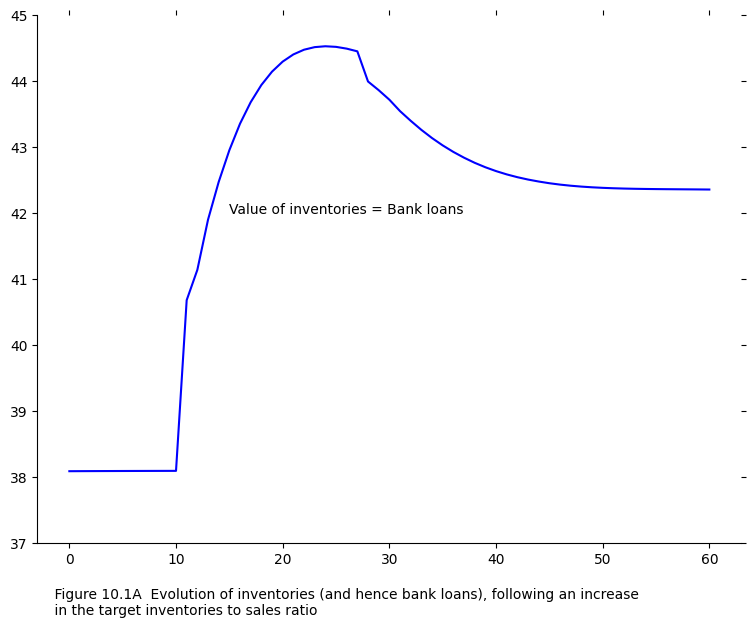

In [48]:
caption = '''
    Figure 10.1A  Evolution of inventories (and hence bank loans), following an increase
    in the target inventories to sales ratio'''
data = [s['IN'] for s in sigma0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(37, 45)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(15, 42, 'Value of inventories = Bank loans')
fig.text(0.1, -.05, caption);

###### Figure 10.1B

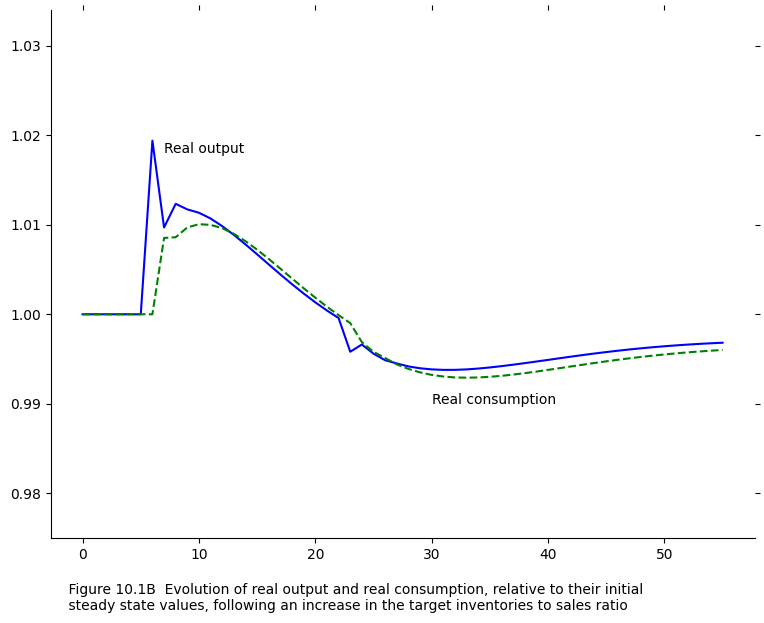

In [49]:
caption = '''
    Figure 10.1B  Evolution of real output and real consumption, relative to their initial
    steady state values, following an increase in the target inventories to sales ratio'''

ykdata = list()
ckdata = list()
for i in range(10, len(sigma0.solutions)):
    ykdata.append(sigma0.solutions[i]['Yk'] / baseline.solutions[i]['Yk'])
    ckdata.append(sigma0.solutions[i]['Ck'] / baseline.solutions[i]['Ck'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.975, 1.034)

axes.plot(ykdata, linestyle='-', color='b')
axes.plot(ckdata, linestyle='--', color='g')

# add labels
plt.text(7, 1.018, 'Real output')
plt.text(30, 0.99, 'Real consumption')
fig.text(0.1, -.05, caption);

###### Figure 10.1C

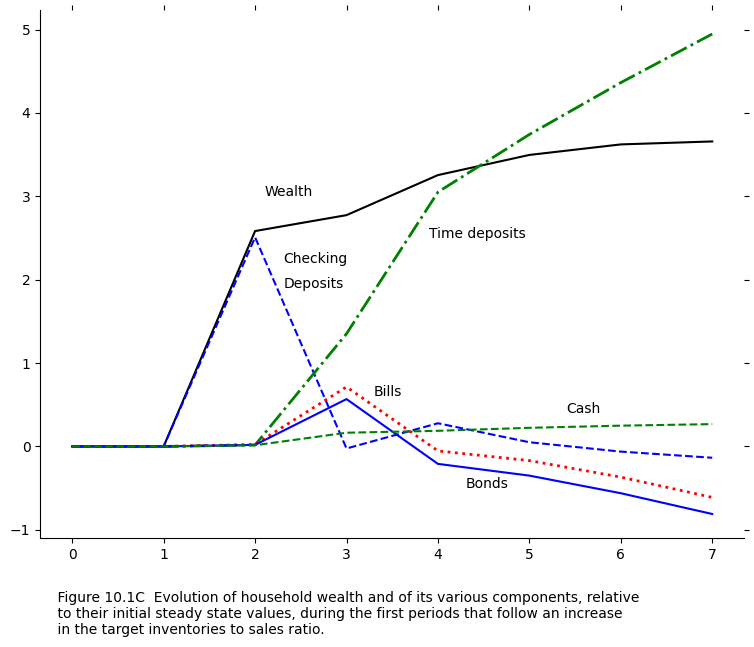

In [50]:
caption = '''
    Figure 10.1C  Evolution of household wealth and of its various components, relative
    to their initial steady state values, during the first periods that follow an increase
    in the target inventories to sales ratio.'''

vdata = list()
m1hdata = list()
m2hdata = list()
bhhdata = list()
pbldata = list()
hhhdata = list()
for i in range(14, 22):
    s1 = sigma0.solutions[i]
    s0 = baseline.solutions[i]
    
    vdata.append( s1['V'] - s0['V'])
    m1hdata.append(s1['M1h'] - s0['M1h'])
    m2hdata.append(s1['M2h'] - s0['M2h'])
    bhhdata.append(s1['Bhh'] - s0['Bhh'])
    pbldata.append(s1['Pbl']*s1['BLh'] - s0['Pbl']*s0['BLh'])
    hhhdata.append(s1['Hhh'] - s0['Hhh'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(vdata, linestyle='-', color='k')
axes.plot(m1hdata, linestyle='--', color='b')
axes.plot(m2hdata, linestyle='-.', color='g', linewidth=2)
axes.plot(bhhdata, linestyle=':', color='r', linewidth=2)
axes.plot(pbldata, linestyle='-', color='b')
axes.plot(hhhdata, linestyle='--', color='g')

# add labels
plt.text(2.1, 3, 'Wealth')
plt.text(2.31, 2.2, 'Checking')
plt.text(2.31, 1.9, 'Deposits')
plt.text(3.9, 2.5, 'Time deposits')
plt.text(5.4, 0.4, 'Cash')
plt.text(3.3, 0.6, 'Bills')
plt.text(4.3, -0.5, 'Bonds')
fig.text(0.1, -.1, caption);

###### Figure 10.1D

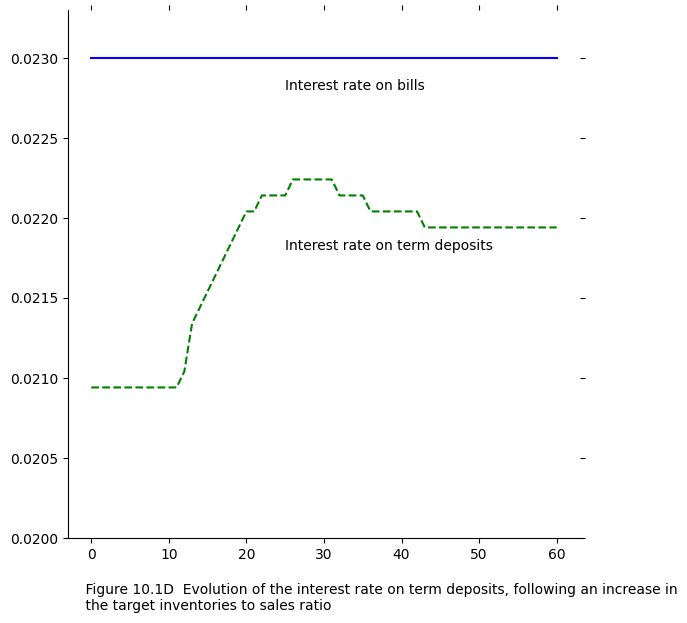

In [51]:
caption = '''
    Figure 10.1D  Evolution of the interest rate on term deposits, following an increase in
    the target inventories to sales ratio'''
rbdata = [s['Rb'] for s in baseline.solutions[5:]]
rmdata = [s['Rm'] for s in sigma0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(.02, .0233)

axes.plot(rbdata, linestyle='-', color='b')
axes.plot(rmdata, linestyle='--', color='g')

# add labels
plt.text(25, 0.0228, 'Interest rate on bills')
plt.text(25, 0.0218, 'Interest rate on term deposits')
fig.text(0.1, -.05, caption);

###### Figure 10.1E

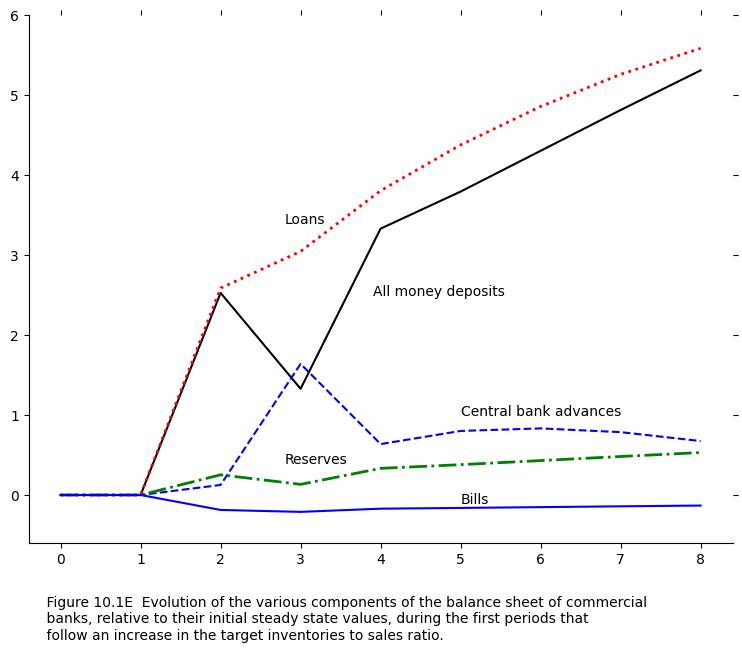

In [52]:
caption = '''
    Figure 10.1E  Evolution of the various components of the balance sheet of commercial
    banks, relative to their initial steady state values, during the first periods that
    follow an increase in the target inventories to sales ratio.'''

m1data = list()
addata = list()
hbddata = list()
lsdata = list()
bbddata = list()
for i in range(14, 23):
    s1 = sigma0.solutions[i]
    s0 = baseline.solutions[i]
   
    m1data.append(s1['M1h'] + s1['M2h'] - (s0['M1h'] + s0['M2h']))
    addata.append(s1['Ad'] - s0['Ad'])
    hbddata.append(s1['Hbd'] - s0['Hbd'])
    lsdata.append(s1['Ls'] - s0['Ls'])
    bbddata.append(s1['Bbd'] - s0['Bbd'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-0.6, 6)

axes.plot(m1data, linestyle='-', color='k')
axes.plot(addata, linestyle='--', color='b')
axes.plot(hbddata, linestyle='-.', color='g', linewidth=2)
axes.plot(lsdata, linestyle=':', color='r', linewidth=2)
axes.plot(bbddata, linestyle='-', color='b')

# add labels
plt.text(3.9, 2.5, 'All money deposits')
plt.text(5, 1, 'Central bank advances')
plt.text(2.8, 0.4, 'Reserves')
plt.text(2.8, 3.4, 'Loans')
plt.text(5, -0.1, 'Bills')
fig.text(0.1, -.1, caption);

###### Figure 10.1F

Using an initial value of .2525 for Rl really smooths the curve out below. This will make
it look more like the figure in the book.

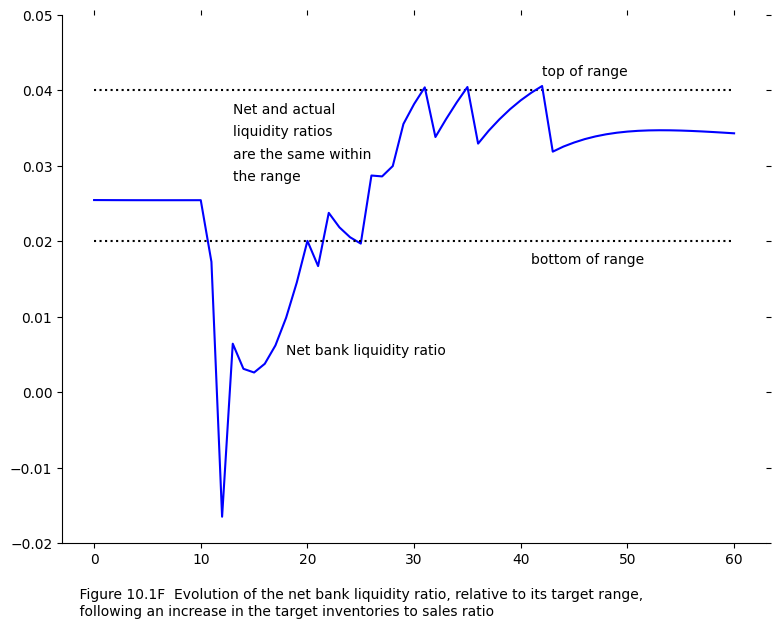

In [53]:
caption = '''
    Figure 10.1F  Evolution of the net bank liquidity ratio, relative to its target range,
    following an increase in the target inventories to sales ratio'''
topdata = [s['top'] for s in sigma0.solutions[5:]]
blrndata = [s['BLRn'] for s in sigma0.solutions[5:]]
botdata = [s['bot'] for s in sigma0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-.02, .05)

axes.plot(topdata, linestyle=':', color='k')
axes.plot(blrndata, linestyle='-', color='b')
axes.plot(botdata, linestyle=':', color='k')

# add labels
plt.text(18, 0.005, 'Net bank liquidity ratio')
plt.text(42, 0.042, 'top of range')
plt.text(41, 0.017, 'bottom of range')
plt.text(13, 0.037, 'Net and actual')
plt.text(13, 0.034, 'liquidity ratios')
plt.text(13, 0.031, 'are the same within')
plt.text(13, 0.028, 'the range')
fig.text(0.1, -.05, caption);

###### Figure 10.1G

Using an initial value of .2525 for Rl really smooths the curve out below. This will make
it look more like the figure in the book.

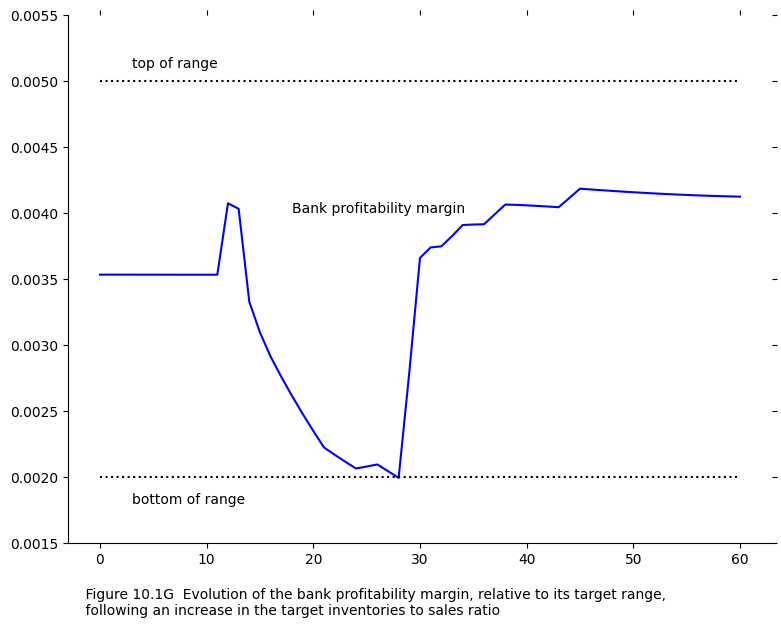

In [54]:
caption = '''
    Figure 10.1G  Evolution of the bank profitability margin, relative to its target range,
    following an increase in the target inventories to sales ratio'''
topdata = [s['toppm'] for s in sigma0.solutions[5:]]
bpmdata = [s['BPM'] for s in sigma0.solutions[5:]]
botdata = [s['botpm'] for s in sigma0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.0015, .0055)

axes.plot(topdata, linestyle=':', color='k')
axes.plot(bpmdata, linestyle='-', color='b')
axes.plot(botdata, linestyle=':', color='k')

# add labels
plt.text(18, 0.004, 'Bank profitability margin')
plt.text(3, 0.0051, 'top of range')
plt.text(3, 0.0018, 'bottom of range')
fig.text(0.1, -.05, caption);

###### Figure 10.1H

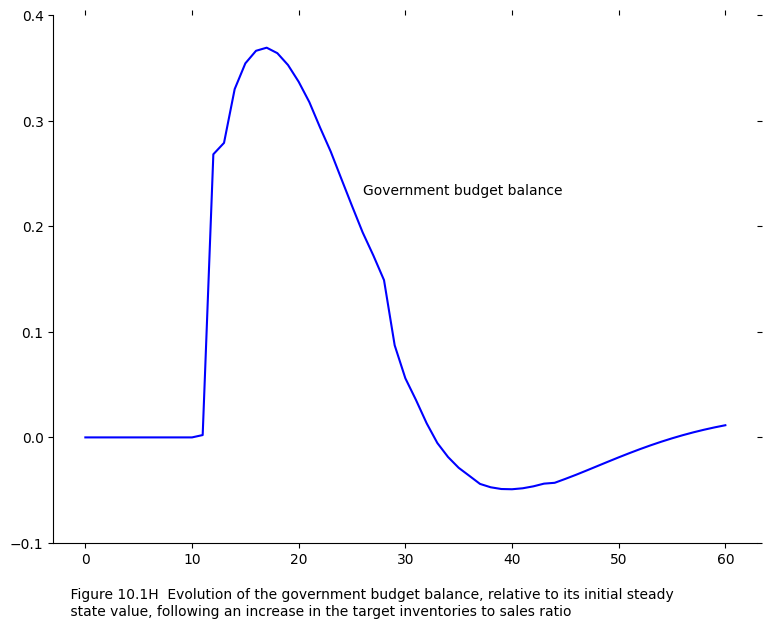

In [55]:
caption = '''
    Figure 10.1H  Evolution of the government budget balance, relative to its initial steady
    state value, following an increase in the target inventories to sales ratio'''

data = list()
for i in range(5, len(sigma0.solutions)):
    s1 = sigma0.solutions[i]
    s0 = baseline.solutions[i]
   
    data.append(s0['PSBR'] - s1['PSBR'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-0.1, 0.4)

axes.plot(data, linestyle='-', color='b')
    
# add labels
plt.text(26,  0.23, 'Government budget balance')
fig.text(0.1, -.05, caption);

###### Figure 10.1I

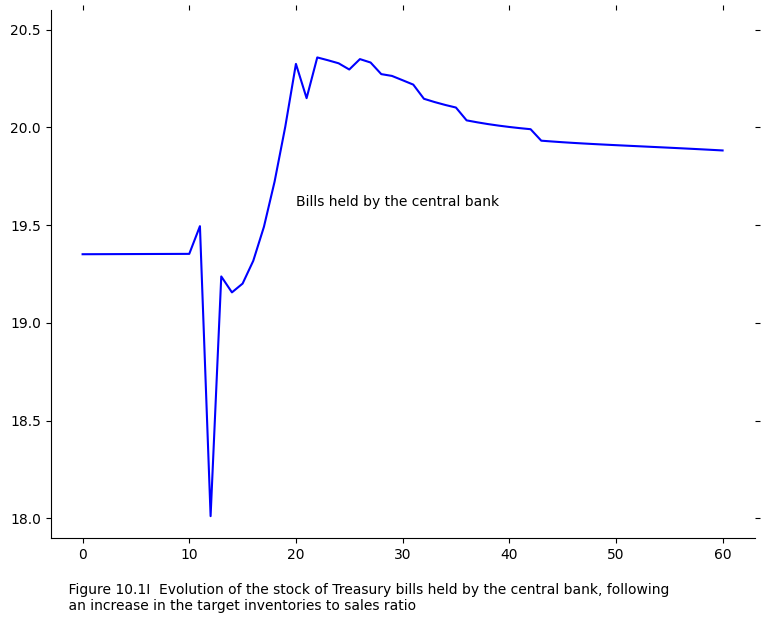

In [56]:
caption = '''
    Figure 10.1I  Evolution of the stock of Treasury bills held by the central bank, following
    an increase in the target inventories to sales ratio'''
bcbdata = [s['Bcb'] for s in sigma0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(17.9, 20.6)

axes.plot(bcbdata, linestyle='-', color='b')

# add labels
plt.text(20, 19.6, 'Bills held by the central bank')
fig.text(0.1, -.05, caption);

### Scenario: Model INSOUT, Increase in real government expenditures

In [57]:
gk = create_insout_model()
gk.set_values(insout_parameters)
gk.set_values(insout_exogenous)
gk.set_values(insout_variables)

for _ in range(15):
    gk.solve(iterations=200, threshold=1e-6)

gk.set_values({'Gk': 30})

for _ in range(50):
    gk.solve(iterations=200, threshold=1e-6)


###### Figure 10.2A

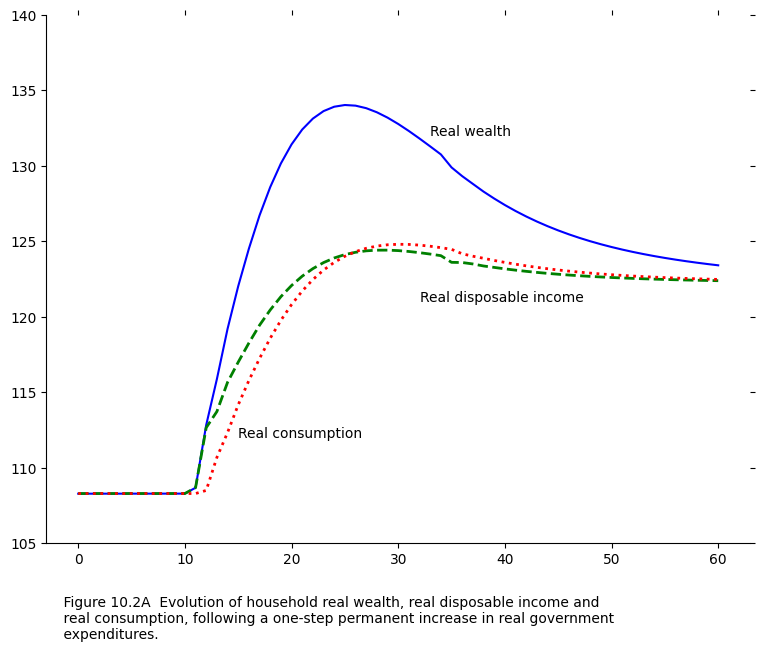

In [58]:
caption = '''
    Figure 10.2A  Evolution of household real wealth, real disposable income and
    real consumption, following a one-step permanent increase in real government
    expenditures.'''
vkdata = [s['Vk'] for s in gk.solutions[5:]]
ydkrdata = [s['YDkr'] for s in gk.solutions[5:]]
ckdata = [s['Ck'] for s in gk.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(105, 140)

axes.plot(vkdata, linestyle='-', color='b')
axes.plot(ydkrdata, linestyle='--', linewidth=2, color='g')
axes.plot(ckdata, linestyle=':', linewidth=2, color='r')

# add labels
plt.text(33, 132, 'Real wealth')
plt.text(15, 112, 'Real consumption')
plt.text(32, 121, 'Real disposable income')
fig.text(0.1, -.1, caption);

###### Figure 10.2B

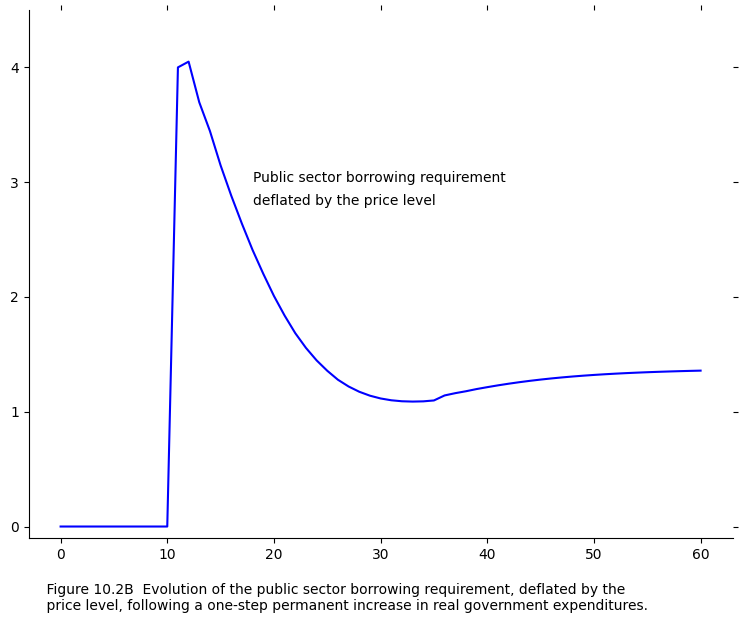

In [59]:
caption = '''
    Figure 10.2B  Evolution of the public sector borrowing requirement, deflated by the
    price level, following a one-step permanent increase in real government expenditures.'''

data = list()
for i in range(5, len(gk.solutions)):
    s2 = gk.solutions[i]
    s0 = baseline.solutions[i]
   
    data.append((s2['PSBR']/s2['P']) - (s0['PSBR']/s0['P']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-0.1, 4.5)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(18,  3, 'Public sector borrowing requirement')
plt.text(18, 2.8, 'deflated by the price level')
fig.text(0.1, -.05, caption);

###### Figure 10.2C

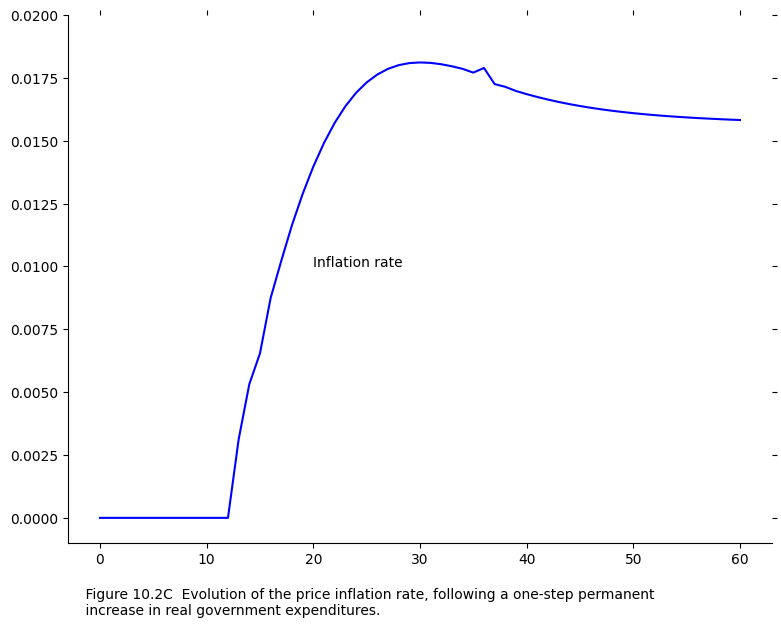

In [60]:
caption = '''
    Figure 10.2C  Evolution of the price inflation rate, following a one-step permanent
    increase in real government expenditures.'''

data = list()
for i in range(5, len(gk.solutions)):
    s2 = gk.solutions[i]
    s0 = baseline.solutions[i]
   
    data.append(s2['PI']- s0['PI'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-0.001, 0.02)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(20, 0.01, 'Inflation rate')
fig.text(0.1, -.05, caption);

###### Figure 10.2D

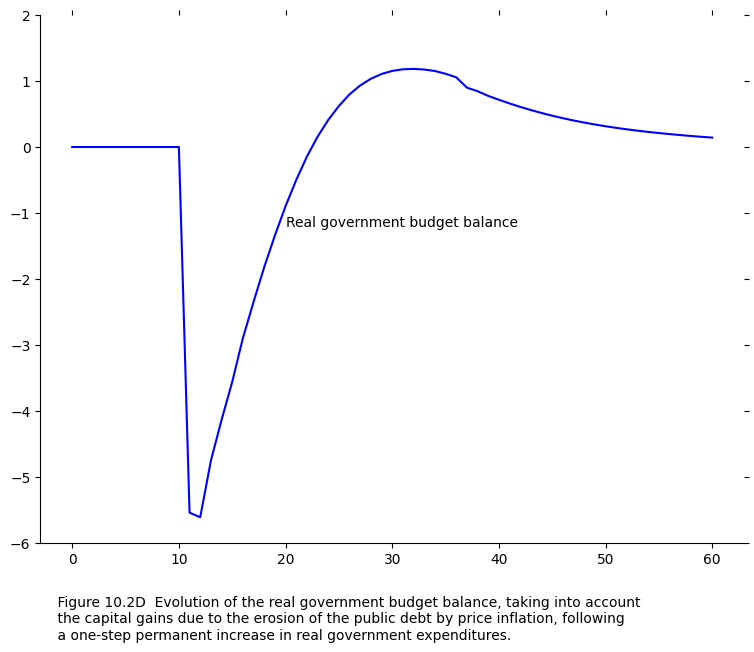

In [61]:
caption = '''
    Figure 10.2D  Evolution of the real government budget balance, taking into account
    the capital gains due to the erosion of the public debt by price inflation, following
    a one-step permanent increase in real government expenditures.'''

data = list()
for i in range(5, len(gk.solutions)):
    s2 = gk.solutions[i]
    s2_1 = gk.solutions[i-1]
    s0 = baseline.solutions[i]
    s0_1 = baseline.solutions[i-1]
   
    data.append((-s2['PSBR'] + (s2['P'] - s2_1['P'])*(s2_1['Bs']+s2_1['BLs']*s2_1['Pbl'])/s2['P']) -
                (-s0['PSBR'] + (s0['P'] - s0_1['P'])*(s0_1['Bs']+s0_1['BLs']*s0_1['Pbl'])/s0['P']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-6, 2)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(20, -1.2, 'Real government budget balance')
fig.text(0.1, -.1, caption);

###### Figure 10.2E

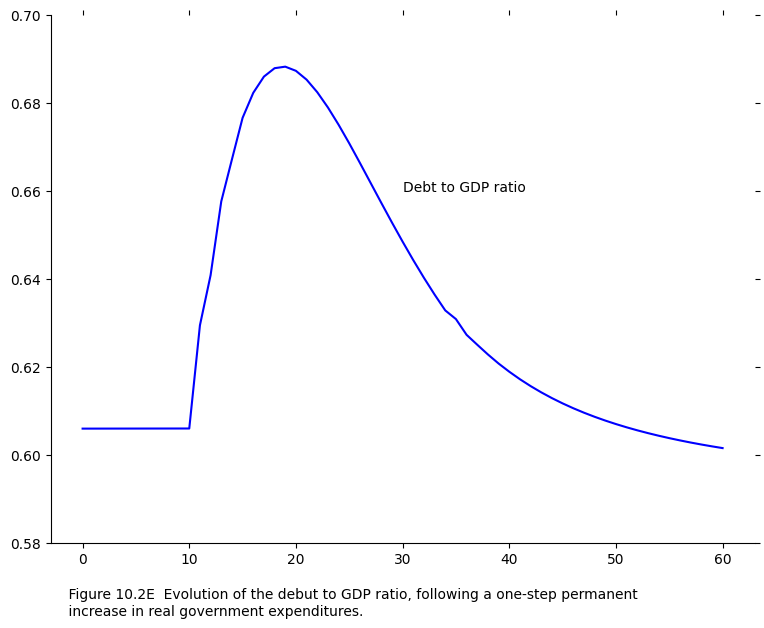

In [62]:
caption = '''
    Figure 10.2E  Evolution of the debut to GDP ratio, following a one-step permanent
    increase in real government expenditures.'''

data = [(s['Bs']+s['BLs']*s['Pbl'])/s['Y'] for s in gk.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(.58, .7)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(30, 0.66, 'Debt to GDP ratio')
fig.text(0.1, -.05, caption);

###### Figure 10.2F

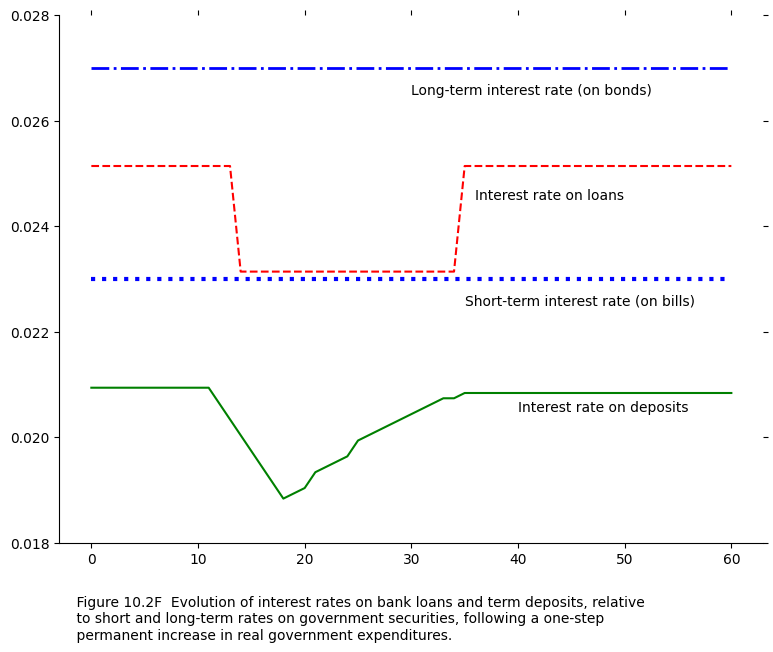

In [63]:
caption = '''
    Figure 10.2F  Evolution of interest rates on bank loans and term deposits, relative
    to short and long-term rates on government securities, following a one-step
    permanent increase in real government expenditures.'''

rbdata = [s['Rb'] for s in gk.solutions[5:]]
rmdata = [s['Rm'] for s in gk.solutions[5:]]
rbldata = [s['Rbl'] for s in gk.solutions[5:]]
rldata = [s['Rl'] for s in gk.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.018, 0.028)

axes.plot(rbdata, linestyle=':', linewidth=3, color='b')
axes.plot(rmdata, linestyle='-', color='g')
axes.plot(rbldata, linestyle='-.', linewidth=2, color='b')
axes.plot(rldata, linestyle='--', color='r')

# add labels
plt.text(30, 0.0265, 'Long-term interest rate (on bonds)')
plt.text(36, 0.0245, 'Interest rate on loans')
plt.text(35, 0.0225, 'Short-term interest rate (on bills)')
plt.text(40, 0.0205, 'Interest rate on deposits')
fig.text(0.1, -.1, caption);

###### Figure 10.2G

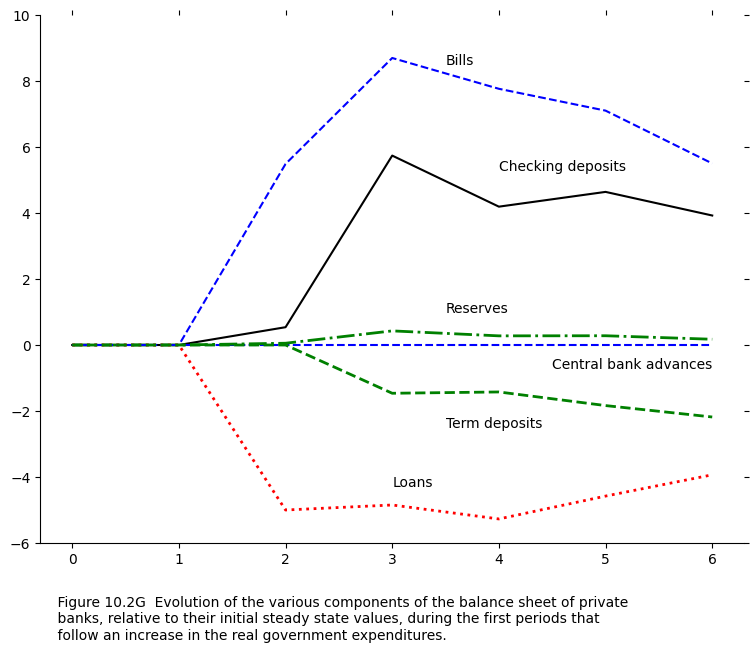

In [64]:
caption = '''
    Figure 10.2G  Evolution of the various components of the balance sheet of private
    banks, relative to their initial steady state values, during the first periods that
    follow an increase in the real government expenditures.'''

m1data = list()
addata = list()
hbddata = list()
lsdata = list()
bbddata = list()
m2data = list()
for i in range(14, 21):
    s0 = baseline.solutions[i]
    s2 = gk.solutions[i]
    
    m1data.append(s2['M1h'] - s0['M1h'])
    addata.append(s2['Ad'] - s0['Ad'])
    hbddata.append(s2['Hbd'] - s0['Hbd'])
    lsdata.append(s2['Ls'] - s0['Ls'])
    bbddata.append(s2['Bbd'] - s0['Bbd'])
    m2data.append(s2['M2h'] - s0['M2h'])
    
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-6, 10)

axes.plot(m1data, linestyle='-', color='k')
axes.plot(addata, linestyle='--', color='b')
axes.plot(hbddata, linestyle='-.', linewidth=2, color='g')
axes.plot(lsdata, linestyle=':', linewidth=2, color='r')
axes.plot(bbddata, linestyle='--', color='b')
axes.plot(m2data, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(4, 5.3, 'Checking deposits')
plt.text(4.5, -0.7, 'Central bank advances')
plt.text(3.5, 1, 'Reserves')
plt.text(3, -4.3, 'Loans')
plt.text(3.5, 8.5, 'Bills')
plt.text(3.5, -2.5, 'Term deposits')
fig.text(0.1, -.1, caption);

###### Figure 10.2H

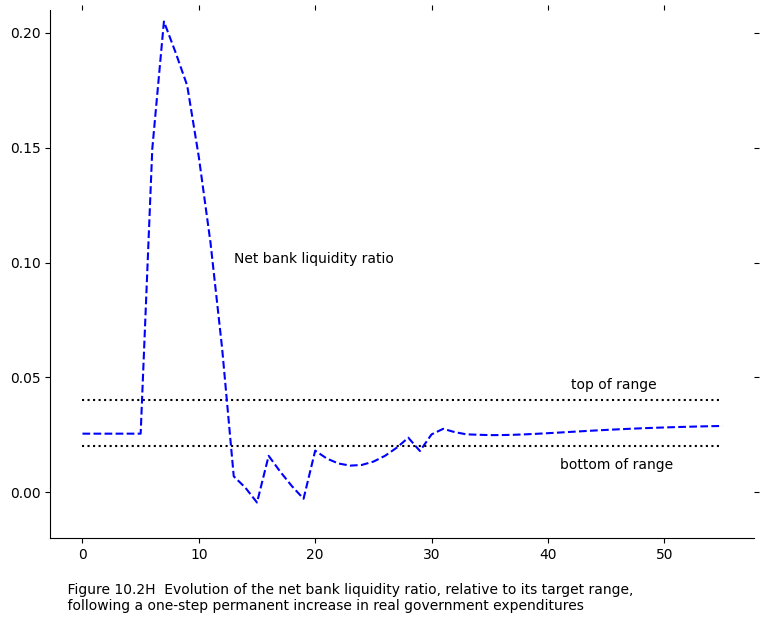

In [65]:
caption = '''
    Figure 10.2H  Evolution of the net bank liquidity ratio, relative to its target range,
    following a one-step permanent increase in real government expenditures'''
topdata = [s['top'] for s in gk.solutions[10:]]
blrndata = [s['BLRn'] for s in gk.solutions[10:]]
botdata = [s['bot'] for s in gk.solutions[10:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-.02, .21)

axes.plot(topdata, linestyle=':', color='k')
axes.plot(blrndata, linestyle='--', color='b')
axes.plot(botdata, linestyle=':', color='k')

# add labels
plt.text(13, 0.10, 'Net bank liquidity ratio')
plt.text(42, 0.045, 'top of range')
plt.text(41, .01, 'bottom of range')
fig.text(0.1, -.05, caption);

###### Figure 10.2I

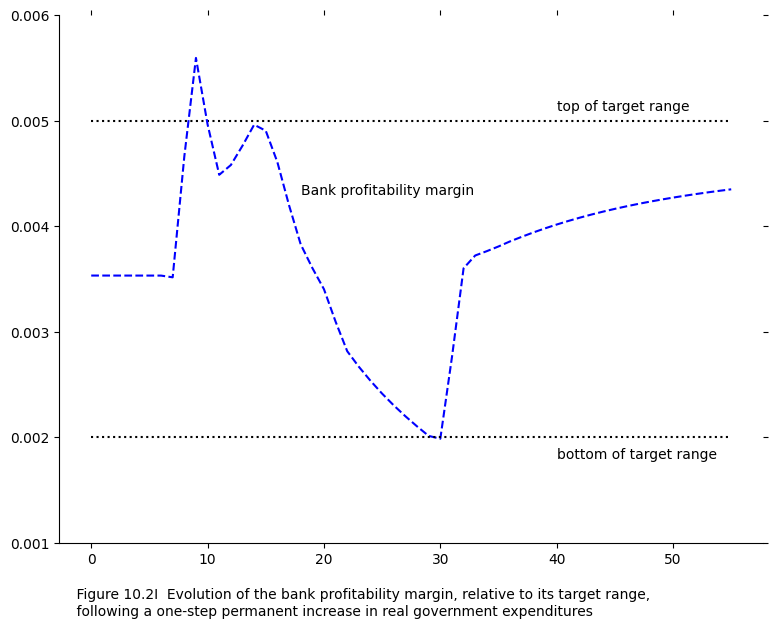

In [66]:
caption = '''
    Figure 10.2I  Evolution of the bank profitability margin, relative to its target range,
    following a one-step permanent increase in real government expenditures'''
topdata = [s['toppm'] for s in gk.solutions[10:]]
bpmdata = [s['BPM'] for s in gk.solutions[10:]]
botdata = [s['botpm'] for s in gk.solutions[10:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.001, .006)

axes.plot(topdata, linestyle=':', color='k')
axes.plot(bpmdata, linestyle='--', color='b')
axes.plot(botdata, linestyle=':', color='k')

# add labels
plt.text(18, 0.0043, 'Bank profitability margin')
plt.text(40, 0.0051, 'top of target range')
plt.text(40, 0.0018, 'bottom of target range')
fig.text(0.1, -.05, caption);

###### Figure 10.2J

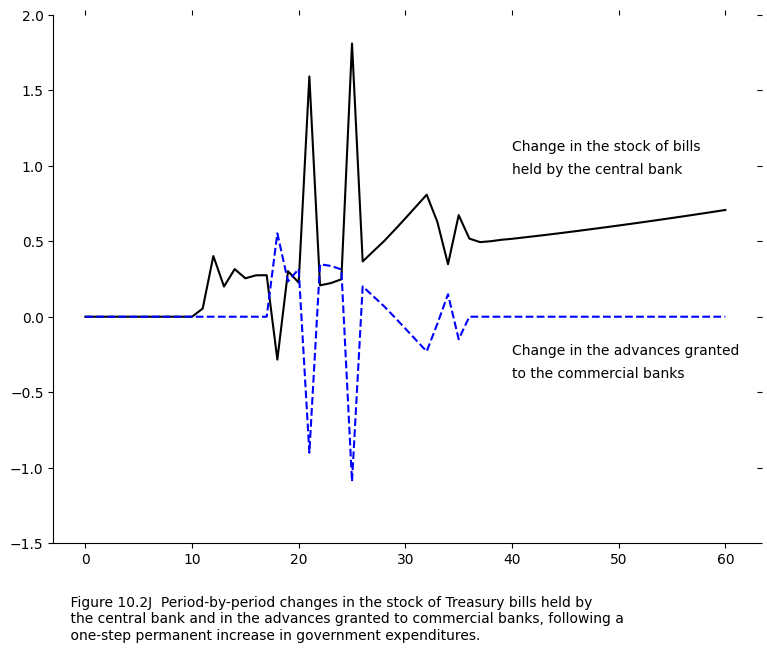

In [67]:
caption = '''
    Figure 10.2J  Period-by-period changes in the stock of Treasury bills held by
    the central bank and in the advances granted to commercial banks, following a
    one-step permanent increase in government expenditures.'''

bcbdata = list()
asdata = list()
for i in range(5, len(baseline.solutions)):
    s0 = baseline.solutions[i]
    s0_1 = baseline.solutions[i-1]
    s2 = gk.solutions[i]
    s2_1 = gk.solutions[i-1]
    
    bcbdata.append(s2['Bcb'] - s2_1['Bcb'] - (s0['Bcb'] - s0_1['Bcb']))
    asdata.append(s2['As'] - s2_1['As'] - (s0['As'] - s0_1['As']))
    
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-1.5, 2)

axes.plot(bcbdata, linestyle='-', color='k')
axes.plot(asdata, linestyle='--', color='b')

# add labels
plt.text(40, 1.1, 'Change in the stock of bills')
plt.text(40, 0.95, 'held by the central bank')
plt.text(40, -0.25, 'Change in the advances granted')
plt.text(40, -0.4, 'to the commercial banks')
fig.text(0.1, -.1, caption);

### Scenario: Model INSOUT, an increase in reserve ratios

In [68]:
ro = create_insout_model()
ro.set_values(insout_parameters)
ro.set_values(insout_exogenous)
ro.set_values(insout_variables)

for _ in range(15):
    ro.solve(iterations=200, threshold=1e-6)

ro.set_values({'ro1': 0.2, 'ro2': 0.2})

for _ in range(50):
    ro.solve(iterations=200, threshold=1e-6)


###### Figure 10.3A

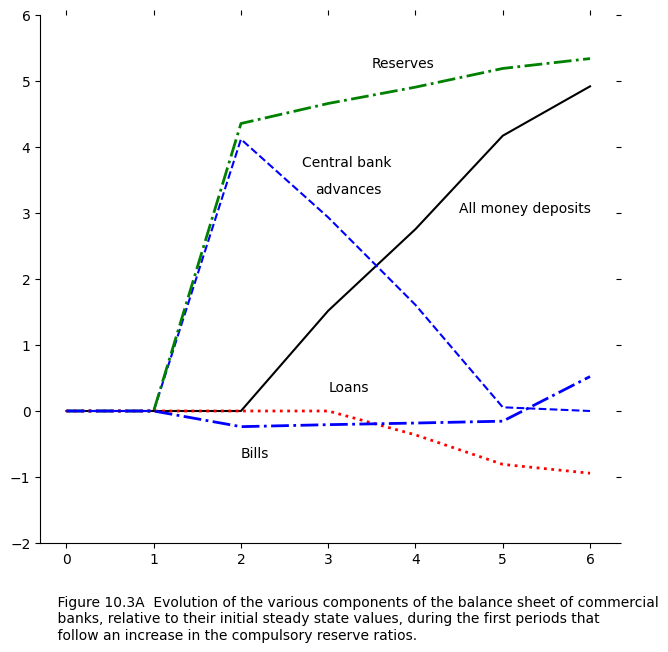

In [69]:
caption = '''
    Figure 10.3A  Evolution of the various components of the balance sheet of commercial
    banks, relative to their initial steady state values, during the first periods that
    follow an increase in the compulsory reserve ratios.'''

mdata = list()
addata = list()
hbddata = list()
lsdata = list()
bbddata = list()
for i in range(14, 21):
    s0 = baseline.solutions[i]
    s3 = ro.solutions[i]
    
    mdata.append(s3['M1h'] + s3['M2h'] - (s0['M1h'] + s0['M2h']))
    addata.append(s3['Ad'] - s0['Ad'])
    hbddata.append(s3['Hbd'] - s0['Hbd'])
    lsdata.append(s3['Ls'] - s0['Ls'])
    bbddata.append(s3['Bbd'] - s0['Bbd'])
    
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-2, 6)

axes.plot(mdata, linestyle='-', color='k')
axes.plot(addata, linestyle='--', color='b')
axes.plot(hbddata, linestyle='-.', linewidth=2, color='g')
axes.plot(lsdata, linestyle=':', linewidth=2, color='r')
axes.plot(bbddata, linestyle='-.', linewidth=2, color='b')

# add labels
plt.text(4.5, 3, 'All money deposits')
plt.text(2.7, 3.7, 'Central bank')
plt.text(2.85, 3.3, 'advances')
plt.text(3.5, 5.2, 'Reserves')
plt.text(3, 0.3, 'Loans')
plt.text(2, -0.7, 'Bills')
fig.text(0.1, -.1, caption);

###### Figure 10.3B

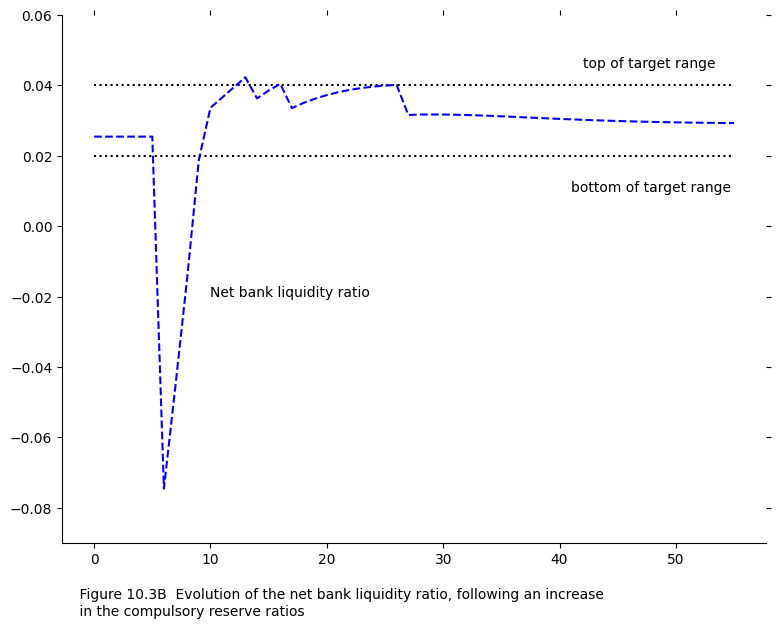

In [70]:
caption = '''
    Figure 10.3B  Evolution of the net bank liquidity ratio, following an increase
    in the compulsory reserve ratios'''
topdata = [s['top'] for s in ro.solutions[10:]]
blrndata = [s['BLRn'] for s in ro.solutions[10:]]
botdata = [s['bot'] for s in ro.solutions[10:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-.09, .06)

axes.plot(topdata, linestyle=':', color='k')
axes.plot(blrndata, linestyle='--', color='b')
axes.plot(botdata, linestyle=':', color='k')

# add labels
plt.text(10, -.02, 'Net bank liquidity ratio')
plt.text(42, 0.045, 'top of target range')
plt.text(41, .01, 'bottom of target range')
fig.text(0.1, -.05, caption);

###### Figure 10.3C

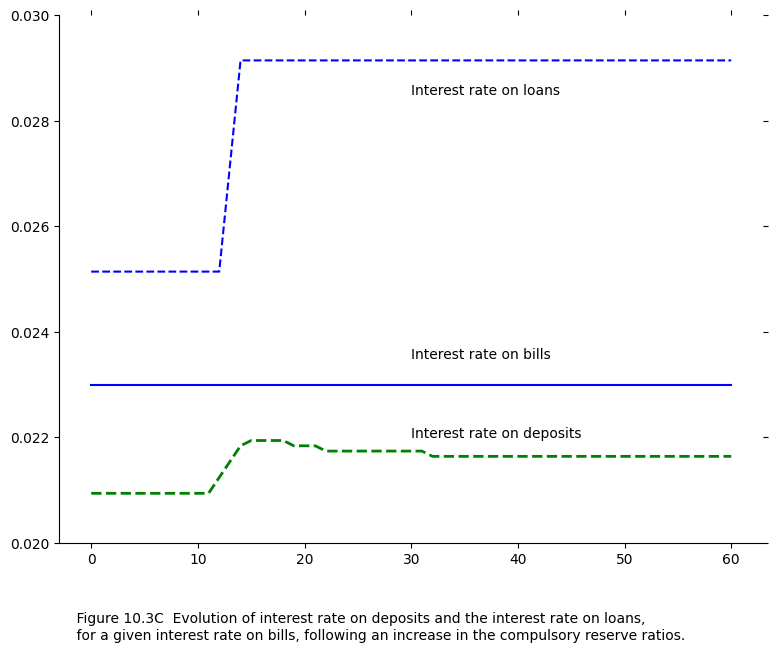

In [71]:
caption = '''
    Figure 10.3C  Evolution of interest rate on deposits and the interest rate on loans,
    for a given interest rate on bills, following an increase in the compulsory reserve ratios.'''

rbdata = [s['Rb'] for s in ro.solutions[5:]]
rmdata = [s['Rm'] for s in ro.solutions[5:]]
rldata = [s['Rl'] for s in ro.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.02, 0.03)

axes.plot(rbdata, linestyle='-', color='b')
axes.plot(rmdata, linestyle='--', linewidth=2, color='g')
axes.plot(rldata, linestyle='--', color='b')
    
# add labels
plt.text(30, 0.0235, 'Interest rate on bills')
plt.text(30, 0.022, 'Interest rate on deposits')
plt.text(30, 0.0285, 'Interest rate on loans')
fig.text(0.1, -.1, caption);

###### Figure 10.3D

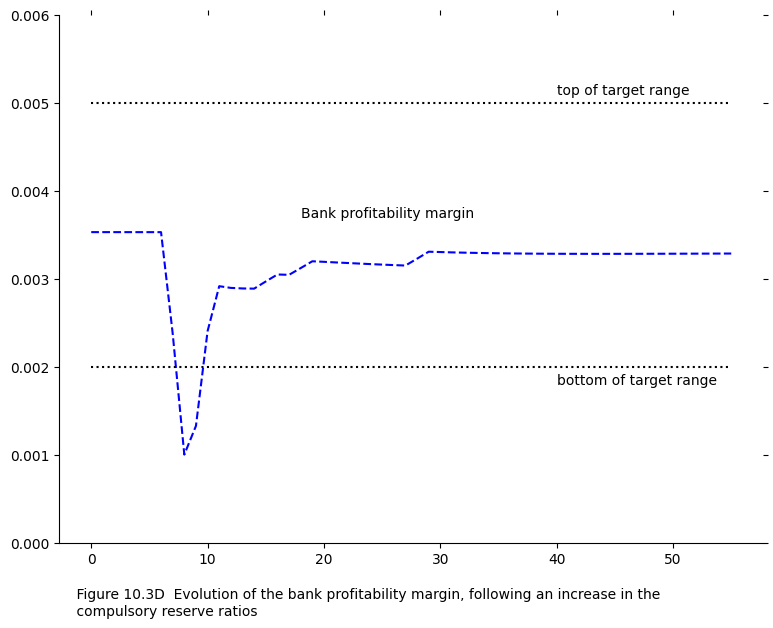

In [72]:
caption = '''
    Figure 10.3D  Evolution of the bank profitability margin, following an increase in the
    compulsory reserve ratios'''
topdata = [s['toppm'] for s in ro.solutions[10:]]
bpmdata = [s['BPM'] for s in ro.solutions[10:]]
botdata = [s['botpm'] for s in ro.solutions[10:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0, .006)

axes.plot(topdata, linestyle=':', color='k')
axes.plot(bpmdata, linestyle='--', color='b')
axes.plot(botdata, linestyle=':', color='k')

# add labels
plt.text(18, 0.0037, 'Bank profitability margin')
plt.text(40, 0.0051, 'top of target range')
plt.text(40, 0.0018, 'bottom of target range')
fig.text(0.1, -.05, caption);

###### Figure 10.3E

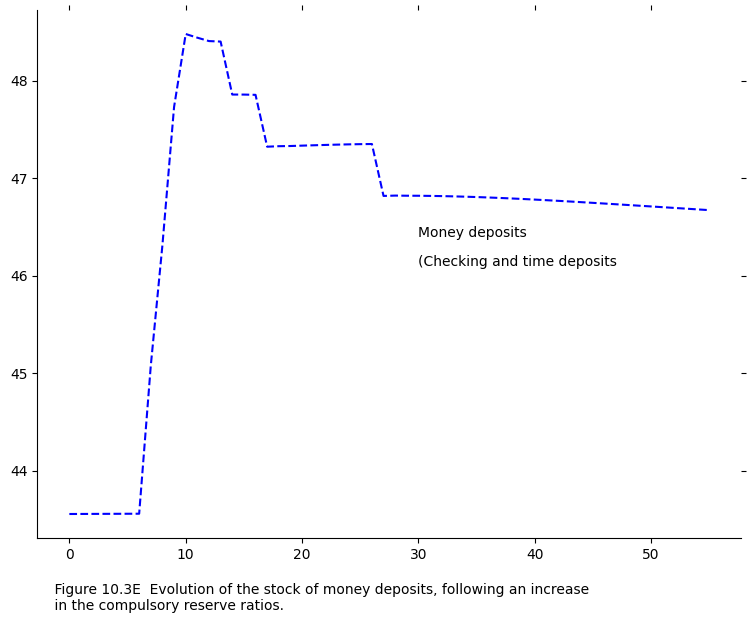

In [73]:
caption = '''
    Figure 10.3E  Evolution of the stock of money deposits, following an increase
    in the compulsory reserve ratios.'''
data = [s['M1h'] + s['M2h'] for s in ro.solutions[10:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(data, linestyle='--', color='b')

# add labels
plt.text(30, 46.4, 'Money deposits')
plt.text(30, 46.1, '(Checking and time deposits')
fig.text(0.1, -.05, caption);

### Scenario: Model INSOUT, increase in banks' target liquidity ratios

In [74]:
liquidity = create_insout_model()
liquidity.set_values(insout_parameters)
liquidity.set_values(insout_exogenous)
liquidity.set_values(insout_variables)

for _ in range(15):
    liquidity.solve(iterations=200, threshold=1e-6)

liquidity.set_values({'bot': 0.16, 'top': 0.18})

for _ in range(50):
    liquidity.solve(iterations=200, threshold=1e-6)


###### Figure 10.4A

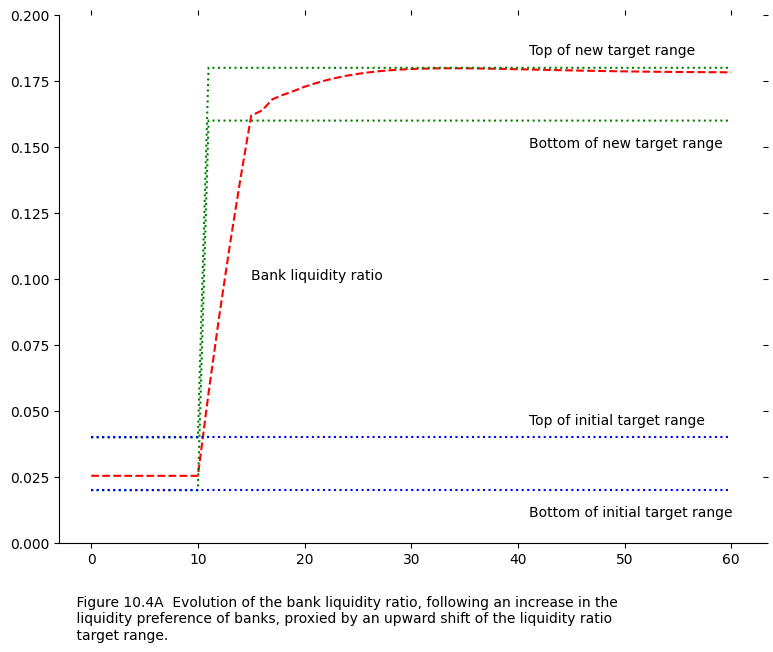

In [75]:
caption = '''
    Figure 10.4A  Evolution of the bank liquidity ratio, following an increase in the
    liquidity preference of banks, proxied by an upward shift of the liquidity ratio
    target range.'''
topdata = [s['top'] for s in liquidity.solutions[5:]]
blrndata = [s['BLRn'] for s in liquidity.solutions[5:]]
botdata = [s['bot'] for s in liquidity.solutions[5:]]
top0data = [s['top'] for s in baseline.solutions[5:]]
bot0data = [s['bot'] for s in baseline.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0, .2)

axes.plot(blrndata, linestyle='--', color='r')
axes.plot(topdata, linestyle=':', color='g')
axes.plot(botdata, linestyle=':', color='g')
axes.plot(top0data, linestyle=':', color='b')
axes.plot(bot0data, linestyle=':', color='b')

# add labels
plt.text(15, 0.1, 'Bank liquidity ratio')
plt.text(41, 0.045, 'Top of initial target range')
plt.text(41, .01, 'Bottom of initial target range')
plt.text(41, 0.185, 'Top of new target range')
plt.text(41, 0.15, 'Bottom of new target range')
fig.text(0.1, -.1, caption);

###### Figure 10.4B

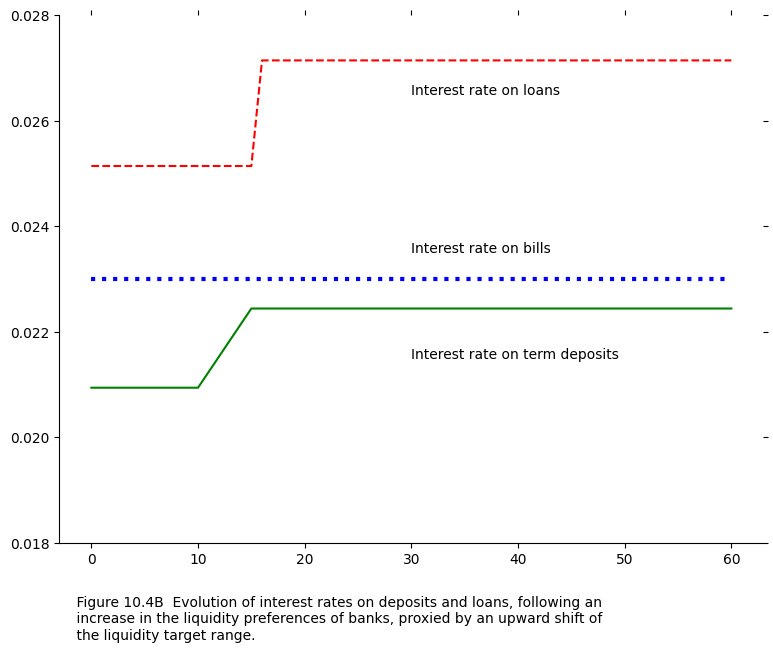

In [76]:
caption = '''
    Figure 10.4B  Evolution of interest rates on deposits and loans, following an
    increase in the liquidity preferences of banks, proxied by an upward shift of
    the liquidity target range.'''

rbdata = [s['Rb'] for s in liquidity.solutions[5:]]
rmdata = [s['Rm'] for s in liquidity.solutions[5:]]
rldata = [s['Rl'] for s in liquidity.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.018, 0.028)

axes.plot(rbdata, linestyle=':', linewidth=3, color='b')
axes.plot(rmdata, linestyle='-', color='g')
axes.plot(rldata, linestyle='--', color='r')

# add labels
plt.text(30, 0.0235, 'Interest rate on bills')
plt.text(30, 0.0215, 'Interest rate on term deposits')
plt.text(30, 0.0265, 'Interest rate on loans')
fig.text(0.1, -.1, caption);

###### Figure 10.4C

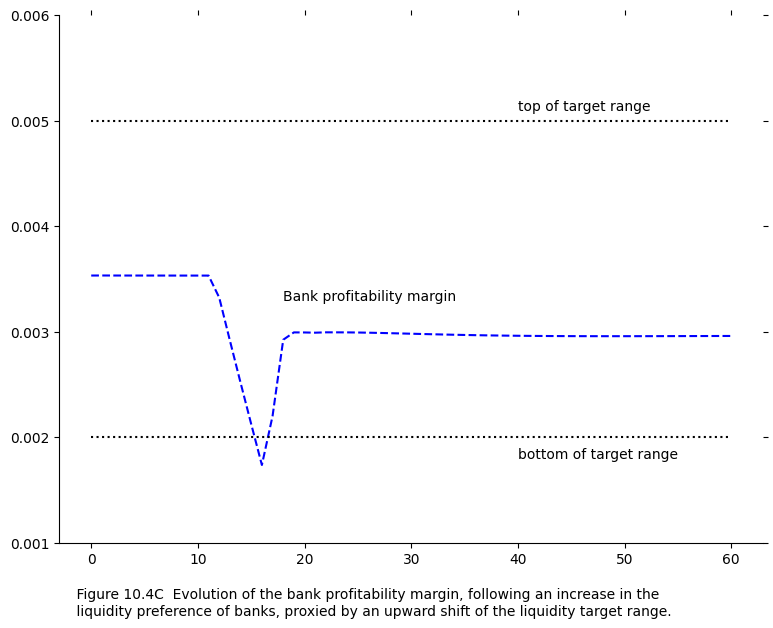

In [77]:
caption = '''
    Figure 10.4C  Evolution of the bank profitability margin, following an increase in the
    liquidity preference of banks, proxied by an upward shift of the liquidity target range.'''
topdata = [s['toppm'] for s in liquidity.solutions[5:]]
bpmdata = [s['BPM'] for s in liquidity.solutions[5:]]
botdata = [s['botpm'] for s in liquidity.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0.001, .006)

axes.plot(topdata, linestyle=':', color='k')
axes.plot(bpmdata, linestyle='--', color='b')
axes.plot(botdata, linestyle=':', color='k')

# add labels
plt.text(18, 0.0033, 'Bank profitability margin')
plt.text(40, 0.0051, 'top of target range')
plt.text(40, 0.0018, 'bottom of target range')
fig.text(0.1, -.05, caption);

###### Figure 10.4D

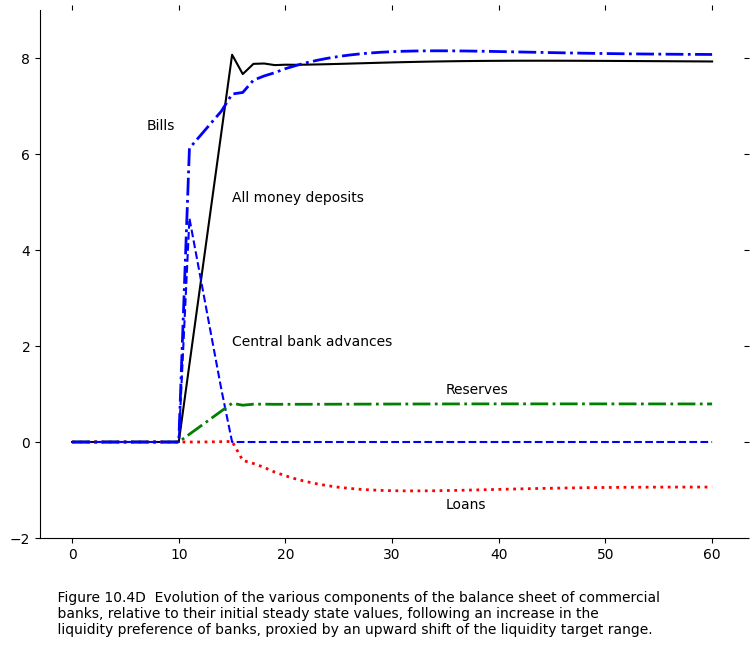

In [78]:
caption = '''
    Figure 10.4D  Evolution of the various components of the balance sheet of commercial
    banks, relative to their initial steady state values, following an increase in the 
    liquidity preference of banks, proxied by an upward shift of the liquidity target range.'''

mdata = list()
addata = list()
hbddata = list()
lsdata = list()
bbddata = list()
for i in range(5, len(baseline.solutions)):
    s0 = baseline.solutions[i]
    s4 = liquidity.solutions[i]
    
    mdata.append(s4['M1h'] + s4['M2h'] - (s0['M1h'] + s0['M2h']))
    addata.append(s4['Ad'] - s0['Ad'])
    hbddata.append(s4['Hbd'] - s0['Hbd'])
    lsdata.append(s4['Ls'] - s0['Ls'])
    bbddata.append(s4['Bbd'] - s0['Bbd'])
    
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-2, 9)

axes.plot(mdata, linestyle='-', color='k')
axes.plot(addata, linestyle='--', color='b')
axes.plot(hbddata, linestyle='-.', linewidth=2, color='g')
axes.plot(lsdata, linestyle=':', linewidth=2, color='r')
axes.plot(bbddata, linestyle='-.', linewidth=2, color='b')

# add labels
plt.text(15, 5, 'All money deposits')
plt.text(15, 2, 'Central bank advances')
plt.text(35, 1, 'Reserves')
plt.text(35, -1.4, 'Loans')
plt.text(7, 6.5, 'Bills')
fig.text(0.1, -.1, caption);

### Scenario: Model INSOUT, decrease in the propensity to consume out of disposable income

In [79]:
alpha1 = create_insout_model()
alpha1.set_values(insout_parameters)
alpha1.set_values(insout_exogenous)
alpha1.set_values(insout_variables)

for _ in range(15):
    alpha1.solve(iterations=200, threshold=1e-6)

alpha1.set_values({'alpha1': 0.9})

for _ in range(50):
    alpha1.solve(iterations=200, threshold=1e-6)


###### Figure 10.5A

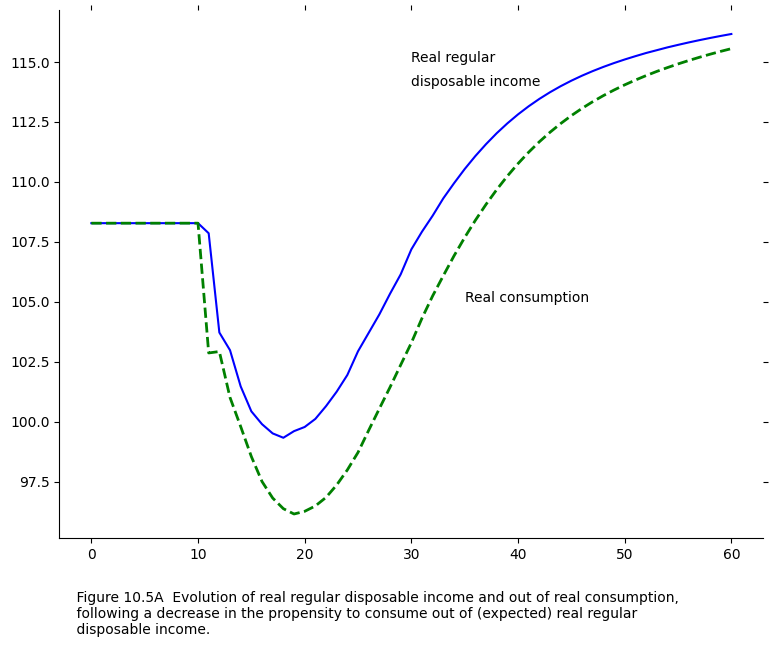

In [80]:
caption = '''
    Figure 10.5A  Evolution of real regular disposable income and out of real consumption,
    following a decrease in the propensity to consume out of (expected) real regular
    disposable income.'''
ydkrdata = [s['YDkr'] for s in alpha1.solutions[5:]]
ckdata = [s['Ck'] for s in alpha1.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(ydkrdata, linestyle='-', color='b')
axes.plot(ckdata, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(30, 115, 'Real regular')
plt.text(30, 114, 'disposable income')
plt.text(35, 105, 'Real consumption')
fig.text(0.1, -.1, caption);

###### Figure 10.5B

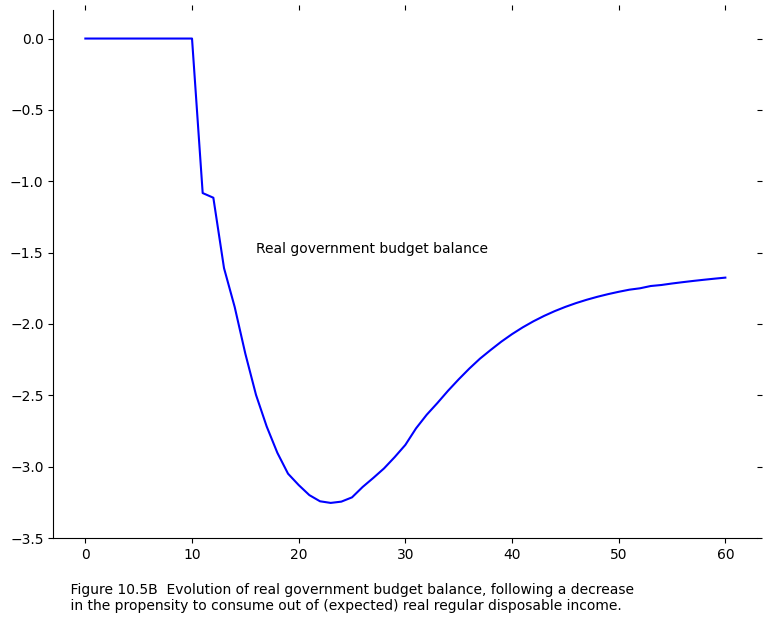

In [81]:
caption = '''
    Figure 10.5B  Evolution of real government budget balance, following a decrease
    in the propensity to consume out of (expected) real regular disposable income.'''
data = list()
for i in range(5, len(baseline.solutions)):
    s0 = baseline.solutions[i]
    s5 = alpha1.solutions[i]
    
    data.append((s0['PSBR']/s0['P']) - (s5['PSBR']/s5['P']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(-3.5, 0.2)
axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(16, -1.5, 'Real government budget balance')
fig.text(0.1, -.05, caption);

### Scenario: Model INSOUT, increase in the target real wage rate

In [82]:
omega0 = create_insout_model()
omega0.set_values(insout_parameters)
omega0.set_values(insout_exogenous)
omega0.set_values(insout_variables)

for _ in range(15):
    omega0.solve(iterations=200, threshold=1e-6)

omega0.set_values({'omega0': -0.28})

for _ in range(50):
    omega0.solve(iterations=200, threshold=1e-6)


###### Figure 10.6A

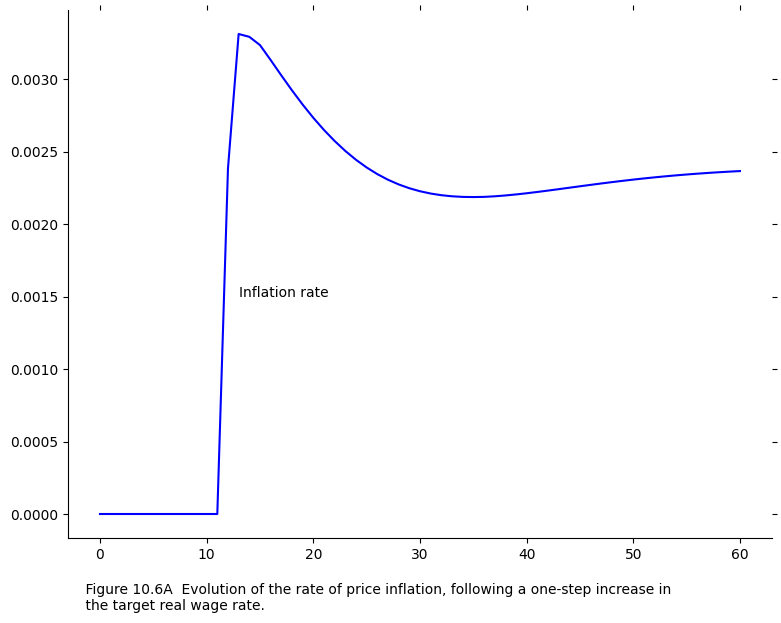

In [83]:
caption = '''
    Figure 10.6A  Evolution of the rate of price inflation, following a one-step increase in
    the target real wage rate.'''
data = list()
for i in range(5, len(baseline.solutions)):
    s0 = baseline.solutions[i]
    s6 = omega0.solutions[i]
    
    data.append(s6['PI'] - s0['PI'])

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(-.0005, 0.0036)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(13, 0.0015, 'Inflation rate')
fig.text(0.1, -.05, caption);

###### Figure 10.6B

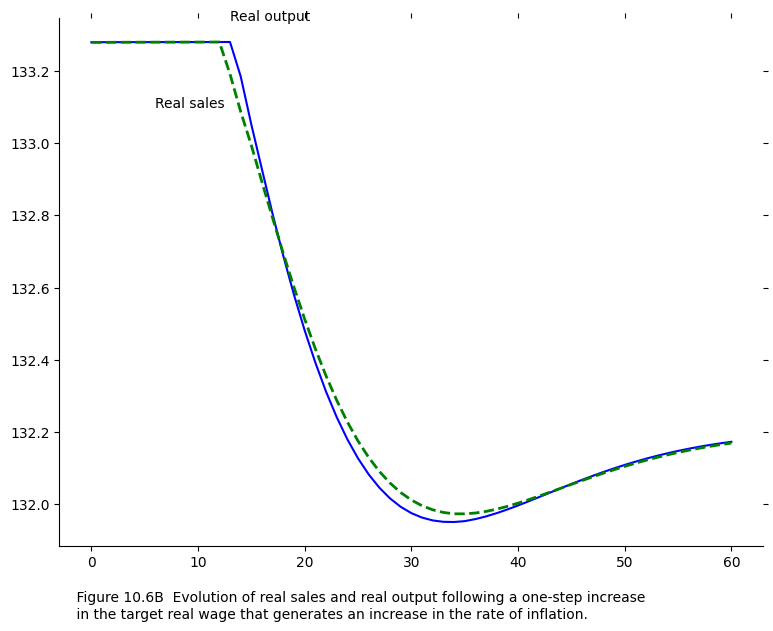

In [84]:
caption = '''
    Figure 10.6B  Evolution of real sales and real output following a one-step increase
    in the target real wage that generates an increase in the rate of inflation.'''
ykdata = [s['Yk'] for s in omega0.solutions[5:]]
skdata = [s['Sk'] for s in omega0.solutions[5:]]

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(90, 140)

axes.plot(ykdata, linestyle='-', color='b')
axes.plot(skdata, linestyle='--', linewidth=2, color='g')

# add labels
plt.text(13, 133.34, 'Real output')
plt.text(6, 133.1, 'Real sales')
fig.text(0.1, -.05, caption);

###### Figure 10.6C

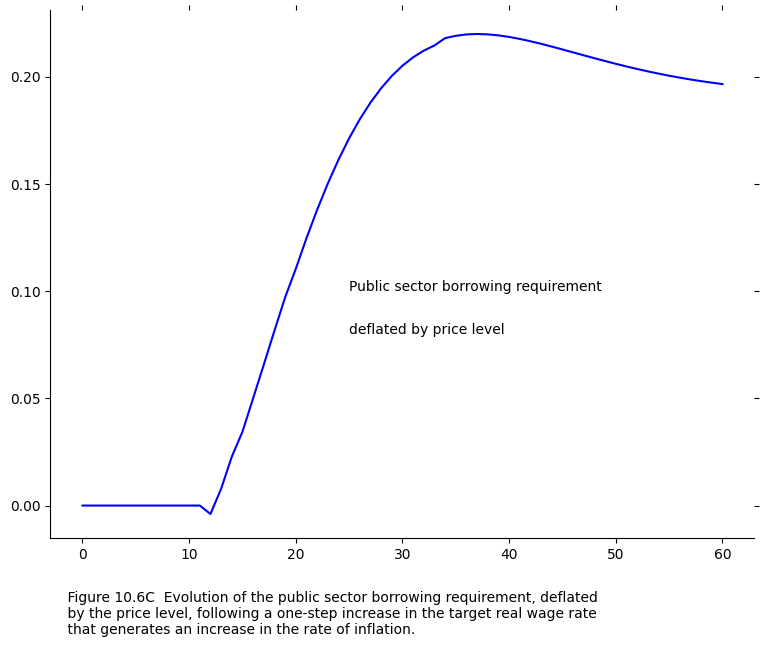

In [85]:
caption = '''
    Figure 10.6C  Evolution of the public sector borrowing requirement, deflated
    by the price level, following a one-step increase in the target real wage rate
    that generates an increase in the rate of inflation.'''
data = list()
for i in range(5, len(baseline.solutions)):
    s0 = baseline.solutions[i]
    s6 = omega0.solutions[i]
    
    data.append((s6['PSBR']/s6['P']) - (s0['PSBR']/s0['P']))
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(25, 0.1, 'Public sector borrowing requirement')
plt.text(25, 0.08, 'deflated by price level')
fig.text(0.1, -.1, caption);

###### Figure 10.6D

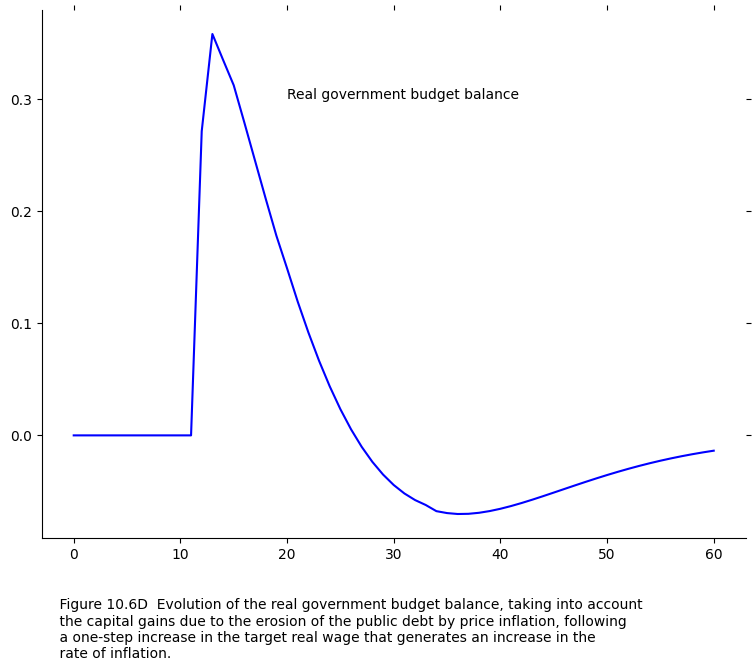

In [86]:
caption = '''
    Figure 10.6D  Evolution of the real government budget balance, taking into account
    the capital gains due to the erosion of the public debt by price inflation, following
    a one-step increase in the target real wage that generates an increase in the
    rate of inflation.'''

data = list()
for i in range(5, len(omega0.solutions)):
    s6 = omega0.solutions[i]
    s6_1 = omega0.solutions[i-1]
    s0 = baseline.solutions[i]
    s0_1 = baseline.solutions[i-1]
   
    data.append((-s6['PSBR'] + (s6['P'] - s6_1['P'])*(s6_1['Bs']+s6_1['BLs']*s6_1['Pbl'])/s6['P']) -
                (-s0['PSBR'] + (s0['P'] - s0_1['P'])*(s0_1['Bs']+s0_1['BLs']*s0_1['Pbl'])/s0['P']))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.1, 1.1])
axes.tick_params(top='off', right='off')
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
#axes.set_ylim(-0.5, 1)

axes.plot(data, linestyle='-', color='b')

# add labels
plt.text(20, 0.3, 'Real government budget balance')
fig.text(0.1, -.15, caption);